In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [102]:
data = pd.read_csv("/content/data.csv")
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [103]:
data.nunique().sort_values()

Unnamed: 0                  1
CollegeTier                 2
CollegeCityTier             2
Gender                      2
Degree                      4
GraduationYear             11
12graduation               16
ComputerScience            20
CivilEngg                  23
CollegeState               26
TelecomEngg                26
ElectronicsAndSemicon      29
ElectricalEngg             31
MechanicalEngg             42
Specialization             46
DOL                        67
ComputerProgramming        79
DOJ                        81
Logical                   107
English                   111
Quant                     138
conscientiousness         141
openess_to_experience     142
agreeableness             149
extraversion              154
Salary                    177
nueroticism               217
Domain                    243
10board                   275
JobCity                   339
12board                   340
Designation               419
12percentage              801
10percenta

In [104]:
data['Unnamed: 0'].unique()

array(['train'], dtype=object)

## **Dropping 'Unnamed: 0' column from data as it is not required**

In [105]:
data.drop(columns='Unnamed: 0',inplace=True)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [107]:
data.shape

(3998, 38)

In [108]:
data.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [109]:
data.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [110]:
data['Degree'].unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

In [111]:
data['Specialization'].nunique()

46

In [112]:
data['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

## **Replacing some specializations for ease of analysis in 'Specialization' column**

In [113]:
replacement_dict = {
    'computers': ['computer engineering', 'computer science & engineering',
                  'computer application', 'computer science and technology',
                  'computer science', 'computer and communication engineering',
                  'computer networking'],
    'electronics': ['electronics and communication engineering',
                    'electronics & telecommunications', 'electronics and computers',
                    'electronics engineering', 'electronics'],
    'information technology': ['information technology', 'information science engineering',
                               'information & communication technology', 'information science'],
    'mechanical': ['mechanical engineering', 'mechanical and automation',
                   'mechanical & production engineering'],
    'Instrumentation': ['instrumentation and control engineering',
                        'control and instrumentation engineering',
                        'electronics and instrumentation engineering',
                        'instrumentation engineering'],
    'electronics & instrumentation': ['applied electronics and instrumentation',
                                      'electronics & instrumentation eng'],
    'electrical': ['electrical engineering', 'electrical and power engineering'],
    'industrial engineering': ['industrial & production engineering',
                               'industrial & management engineering', 'industrial engineering']
}

# Iterate over the dictionary and perform replacements
for category, elements_to_replace in replacement_dict.items():
    data['Specialization'] = data['Specialization'].replace(elements_to_replace, category, regex=True)

In [114]:
data['Specialization'].nunique()

24

In [115]:
data['Specialization'].unique()

array(['computers', 'electronics', 'information technology', 'mechanical',
       'electronics and electrical', 'Instrumentation', 'electrical',
       'electronics & instrumentation', 'civil engineering',
       'industrial engineering', 'metallurgical engineering',
       'ceramic engineering', 'chemical engineering',
       'aeronautical engineering', 'other', 'biotechnology',
       'embedded systems technology', 'mechatronics',
       'automobile/automotive engineering', 'polymer technology',
       'power systems and automation', 'telecommunication engineering',
       'internal combustion engine', 'biomedical engineering'],
      dtype=object)

## **Clearing redundancy in " 10board " and " 12board " columns using fuzzywuzzy -- lavenshtein distance technique**

In [116]:
!pip install fuzzywuzzy

In [117]:
from fuzzywuzzy import process

In [118]:
choices_10board = ['andhra pradesh','ap','aurangabad','bihar','board of secondary education(bse)','cbse','delhi','gujarat','haryana','himachal pradesh','icse','j&k',
                   'jharkhand','karnataka', 'kerala', 'kolhapur', 'madhya pradesh', 'maharashtra', 'matriculation', 'mp', 'mumbai', 'nagpur', 'orissa', 'patna', 'pune', 'rajasthan',
                   'rbse', 'ssc', 'state board', 'tamilnadu', 'up', 'uttarakhand', 'uttaranchal', 'wb', 'west bengal']

In [119]:
choices_12board = ['Intermediate', 'allahabad', 'andhra pradesh', 'ap', 'aurangabad', 'bihar', 'bse', 'cbse', 'central', 'delhi', 'diploma', 'haryana', 'higher secondary', 'himachal pradesh', 'hse',
                    'icse', 'j&k', 'jharkhand', 'karnataka', 'kerala', 'lucknow', 'maharashtra', 'mp', 'mumbai', 'nagpur', 'orissa', 'patna', 'polytechnic', 'pre university', 'pu', 'pune', 'punjab',
                    'rajasthan', 'rbse', 'tamil nadu', 'up', 'uttar pradesh', 'uttarakhand', 'uttaranchal', 'wb', 'west bengal']

In [120]:
def corrected_words(target_word = '',choices = [],threshold = 80) :
  match,score = process.extractOne(target_word,choices)
  if score >= threshold :
    return match
  else :
    return target_word

In [121]:
print('len of 10board : ',len(data['10board'].unique()))
print('len of 12board : ',len(data['12board'].unique()))

len of 10board :  275
len of 12board :  340


In [122]:
data['10board_processed'] = data['10board'].apply(lambda x : corrected_words(x,choices_10board))
data['12board_processed'] = data['12board'].apply(lambda x : corrected_words(x,choices_12board))

In [123]:
print('len of processed 10board : ',len(data['10board_processed'].unique()))
print('len of processed 12board : ',len(data['12board_processed'].unique()))

len of processed 10board :  82
len of processed 12board :  129


In [124]:
data['12graduation'].unique()

array([2007, 2010, 2008, 2009, 2006, 2011, 2005, 1995, 2004, 2012, 2003,
       2002, 2001, 1998, 2013, 1999])

In [125]:
data['CollegeCityID'].unique()

array([1141, 5807,   64, ..., 3572, 6327, 4883])

In [126]:
data['CollegeID'].unique()

array([1141, 5807,   64, ..., 3572, 6327, 4883])

In [127]:
data[['CollegeID','CollegeCityID']].head()

,CollegeID,CollegeCityID
0,1141,1141
1,5807,5807
2,64,64
3,6920,6920
4,11368,11368


In [128]:
(data['CollegeCityID']==data['CollegeID']).sum()
# clearly 'CollegeCityID' and 'CollegeID' columns are having same values in every row

3998

In [129]:
# dropping 'CollegeID' column
data.drop(columns='CollegeID',inplace=True)

In [130]:
(data['CollegeCityTier']==data['CollegeTier']).sum()

138

## **Converting 'CollegeID' , 'CollegeTier' , 'CollegeCityTier'  columns to object**

In [131]:
data['CollegeCityID']       = data['CollegeCityID'].astype(str)
data['CollegeTier']     = data['CollegeTier'].astype(str)
data['CollegeCityTier'] = data['CollegeCityTier'].astype(str)

In [132]:
data[['12graduation', 'GraduationYear', 'DOJ', 'DOL', 'DOB']].head()

,12graduation,GraduationYear,DOJ,DOL,DOB
0,2007,2011,6/1/12 0:00,present,2/19/90 0:00
1,2007,2012,9/1/13 0:00,present,10/4/89 0:00
2,2010,2014,6/1/14 0:00,present,8/3/92 0:00
3,2007,2011,7/1/11 0:00,present,12/5/89 0:00
4,2008,2012,3/1/14 0:00,3/1/15 0:00,2/27/91 0:00


## **'12graduation' , 'GraduationYear' to numeric  'DOJ','DOL'  and 'DOB'  columns to be converted to 'date' type**

In [133]:
import tqdm
from datetime import datetime

In [134]:
date_columns = ['12graduation', 'GraduationYear', 'DOJ', 'DOL', 'DOB']
def convert_to_date(value):
    if value == 'present':
        return datetime.today().date()  # Replace 'present' with today's date
    else:
        return pd.to_datetime(value).date()

date_columns = ['DOJ', 'DOL', 'DOB']
for col in date_columns:
    data[col] = data[col].apply(convert_to_date)

# Convert '12graduation' and 'GraduationYear' to numeric
data['12graduation'] = pd.to_numeric(data['12graduation'], errors='coerce')
data['GraduationYear'] = pd.to_numeric(data['GraduationYear'], errors='coerce')

## **Cleaning 'JobCity' column from spelling mistakes and redundancies**

In [135]:
len(set(data['JobCity'].unique()))

339

In [136]:
data['JobCity'] = data['JobCity'].str.lower().str.strip()

In [137]:
len(data['JobCity'].unique())

232

In [138]:
# vizag , visakhapatnam
# 'thiruvananthapuram','trivandrum',

In [139]:
data['JobCity'] = data['JobCity'].str.replace(r'#\s*vizag', 'visakhapatnam', case=False)
data['JobCity'] = data['JobCity'].str.replace(r'#\s*trivandrum', 'thiruvananthapuram', case=False)

In [140]:
job_cities = [
    'noida', 'agra', 'ahmedabad', 'ahmednagar', 'al jubail', 'allahabad', 'alwar', 'ambala', 'angul', 'ariyalur',
    'asansol', 'asifabad', 'aurangabad', 'australia', 'baddi hp', 'bahadurgarh', 'banagalore', 'bankura', 'bareli',
    'baripada', 'baroda', 'bathinda', 'beawar', 'belgaum', 'bellary', 'bhagalpur', 'bharuch', 'bhilai', 'bhiwadi',
    'bhopal', 'bhubaneshwar', 'bihar', 'bikaner', 'bilaspur', 'bulandshahar', 'bundi', 'burdwan', 'calicut',
    'chandigarh', 'chandrapur', 'chennai', 'chennai & mumbai', 'chennai, bangalore', 'cheyyar', 'coimbatore',
    'daman and diu', 'dammam', 'dausa', 'dehradun', 'delhi', 'delhi/ncr', 'dhanbad', 'dharamshala', 'dharmapuri',
    'dharuhera', 'dubai', 'durgapur', 'ernakulam', 'faridabad', 'gagret', 'gandhi nagar', 'ganjam', 'ghaziabad',
    'gonda', 'gorakhpur', 'greater noida', 'gulbarga', 'gurgaon', 'guwahati', 'gwalior', 'haldia', 'haridwar',
    'haryana', 'hissar', 'hospete', 'howrah', 'hubli', 'hyderabad', 'bhadurpally', 'india', 'indirapuram, ghaziabad',
    'indore', 'jabalpur', 'jagdalpur', 'jaipur', 'jalandhar', 'jammu', 'jamnagar', 'jamshedpur', 'jaspur', 'jeddah',
    'jhajjar', 'jhansi', 'jodhpur', 'johannesburg', 'joshimath', 'jowai', 'kakinada', 'kala amb', 'kalmar, sweden',
    'kanpur', 'karad', 'karnal', 'kerala', 'kharagpur', 'khopoli', 'kochi', 'kolhapur', 'kolkata', 'kota',
    'kudankulam ,tarapur', 'kurnool', 'latur', 'london', 'lucknow', 'ludhiana', 'madurai', 'maharajganj', 'manipuri',
    'manesar', 'mangalore', 'meerut', 'mettur', 'miryalaguda', 'mohali', 'mumbai', 'muvattupuzha', 'muzaffarnagar',
    'mysore', 'nagari', 'nagpur', 'nalagarh', 'nanded', 'nashik', 'navi mumbai', 'navi mumbai , hyderabad', 'ncr',
    'neemrana', 'nellore', 'new dehli', 'new delhi - jaisalmer', 'noida', 'ongole', 'orissa', 'panchkula',
    'pantnagar', 'patiala', 'patna', 'phagwara', 'pilani', 'pondicherry', 'punchkula', 'pune', 'raigarh', 'raipur',
    'rajasthan', 'rajkot', 'rajpura', 'ranchi', 'ras al khaimah', 'ratnagiri', 'rayagada', 'rewari', 'rohtak',
    'rourkela', 'rudrapur', 'sadulpur,rajgarh,distt-churu,rajasthan', 'sahibabad', 'salem', 'sambalpur', 'sampla',
    'secunderabad', 'shahdol', 'shahibabad', 'shimla', 'siliguri', 'singaruli', 'sonipat', 'surat', 'trivandrum',
    'thane', 'thiruvananthapuram', 'tirunelvelli', 'tirupati', 'tornagallu', 'trichy', 'trivandrum', 'udaipur',
    'unnao', 'vadodara', 'vandavasi', 'vapi', 'varanasi', 'vellore', 'vijayawada', 'visakhapatnam', 'vizag',
    'yamuna nagar'
]


In [141]:
data['JobCity'] = data['JobCity'].apply(lambda x : corrected_words(x,job_cities))

In [142]:
len(data['JobCity'].unique())

205

## **checking on 'designation' column**

In [143]:
data['Designation'] = data['Designation'].str.lower().str.strip()

In [144]:
data['Designation'].nunique()

419

In [145]:
# Under Designation column not much redundancy can be seen
# further even more optimization can happen by filtering designations according to ones understanding and knowledge

In [146]:
designation_mapping = {'dotnet developer': '.net developer',
    '.net web developer': '.net developer',
    'systems engineer' : 'system engineer',
    'software devloper': 'software developer',
    'software eng': 'software engineer',
    'software engg': 'software engineer',
    'software engineere': 'software engineer',
    'software enginner': 'software engineer',
    'software test engineer (etl)': 'software test engineer',
    'software test engineerte': 'software test engineer',
    'assistant system engineer - trainee': 'assistant system engineer trainee',
    'assistant systems engineer': 'assistant system engineer',
    'associate software engg': 'associate software engineer',
    'business development managerde': 'business development manager',
    'business systems analyst': 'business system analyst',
    'co faculty': 'computer faculty',
    'db2 dba': 'dba',
    'executive engg': 'executive engineer',
    'get' : 'general manager',
    'graduate trainee engineer': 'graduate engineer trainee',
    'human resources executive': 'hr executive',
     'human resource assistant': 'hr assistant',
    'human resources manager': 'hr manager',
   'human resources analyst':'hr analyst',
   'human resources associate':'hr associate',
   'human resources intern':'hr intern',
    'operations engineer and jetty handling': 'operations engineer',
    'qa analyst': 'quality analyst',
    'qa engineer': 'quality engineer',
    'qa trainee': 'quality trainee',
    'r & d': 'r&d engineer',
    'rf/dt engineer': 'rf engineer',
    'sales and service engineer': 'sales & service engineer',
    'seo': 'seo analyst',
    'team leader': 'team lead',
    'systems analyst': 'system analyst',
    'systems administrator': 'system administrator',
    'testing engineer': 'test engineer',
    'web designer and joomla administrator': 'web designer',
    'web designer and seo': 'web designer'}

In [147]:
data['Designation'] = data['Designation'].replace(designation_mapping)

In [148]:
data['Designation'].nunique()

385

## **Creating 'Experience' column based on 'DOL' and 'DOJ' columns**
####     DOJ should not be greater than DOL ... if present those columns has to be removed

In [149]:
data[data['DOL']<data['DOJ']].shape

(40, 39)

In [150]:
data.drop(data[data['DOL']<data['DOJ']].index,inplace=True)

In [151]:
data.shape

(3958, 39)

In [152]:
data['experience'] = (data['DOL']-data['DOJ']) / pd.Timedelta(days=365.25)

## **Univariate Analysis on Numerical columns**

In [153]:
# Filter out numerical and categorical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

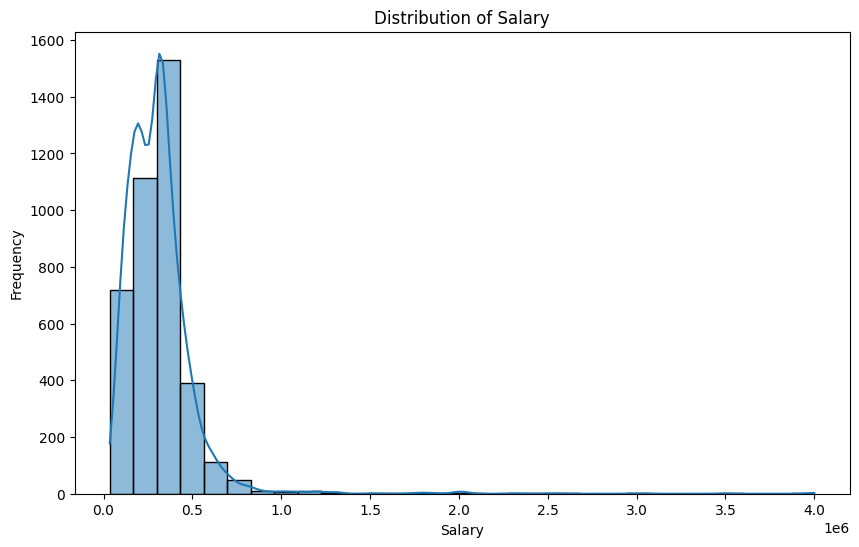

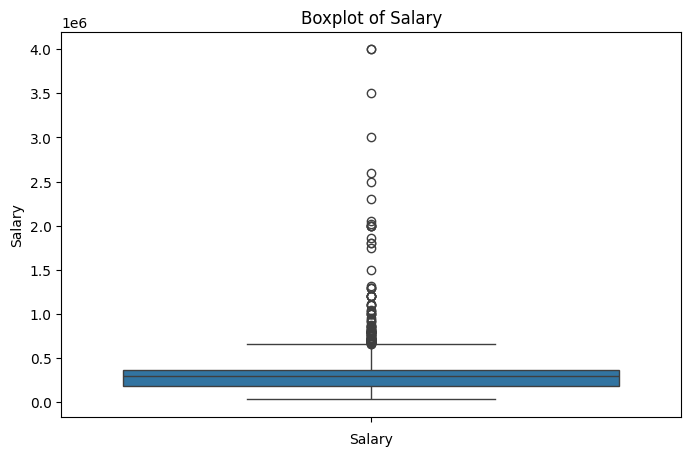

Number of outliers in Salary: 107


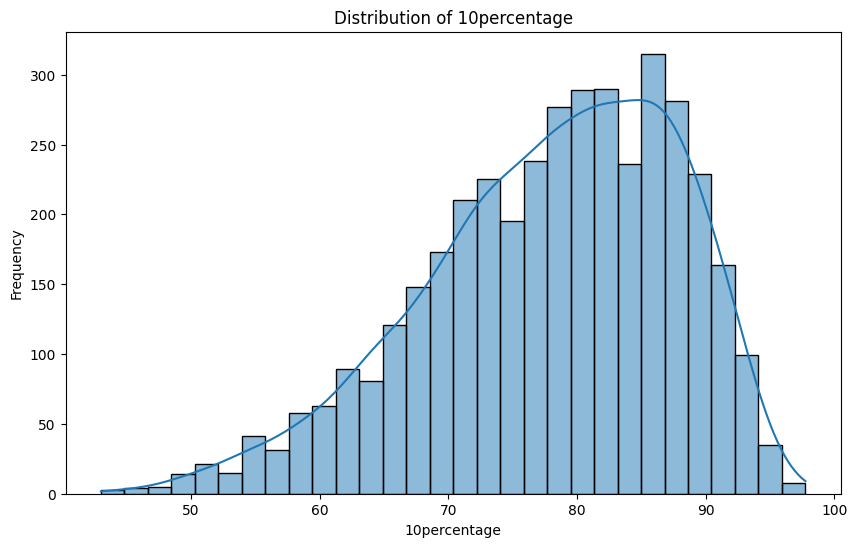

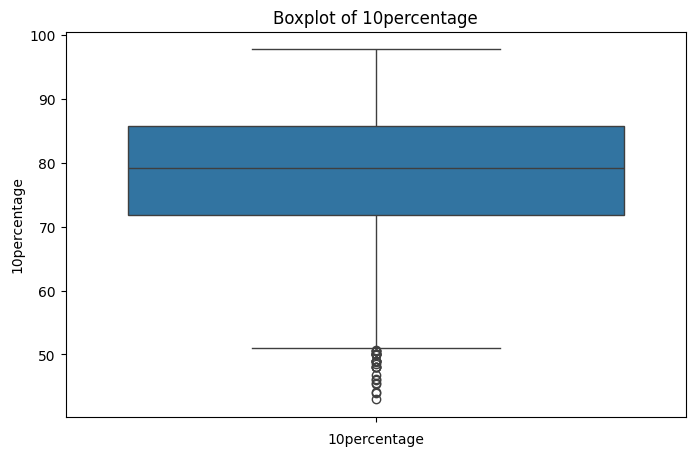

Number of outliers in 10percentage: 30


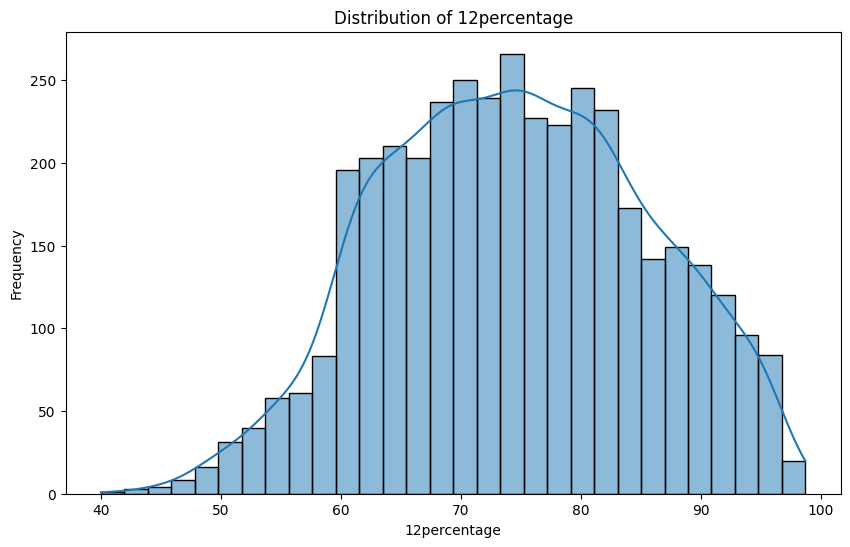

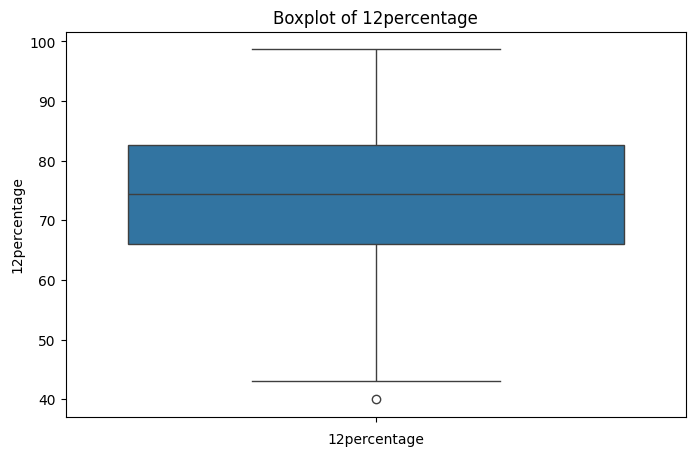

Number of outliers in 12percentage: 1


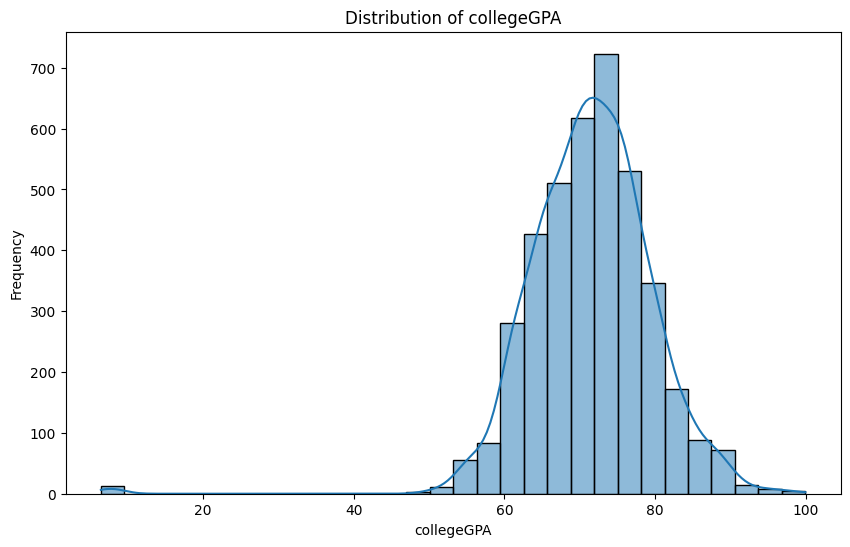

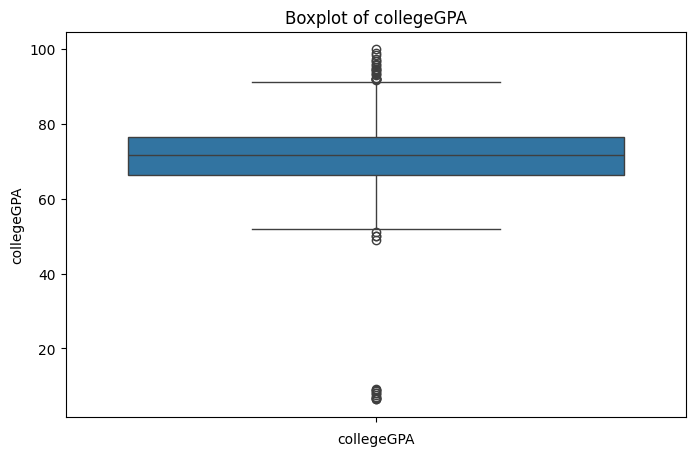

Number of outliers in collegeGPA: 38


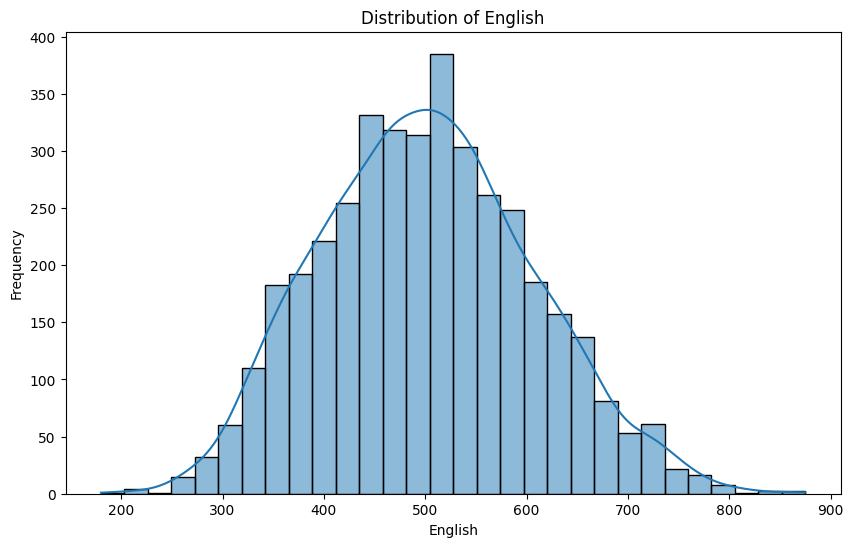

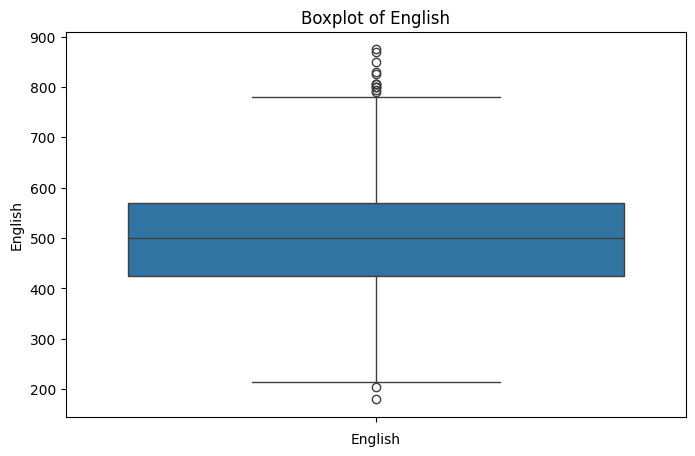

Number of outliers in English: 15


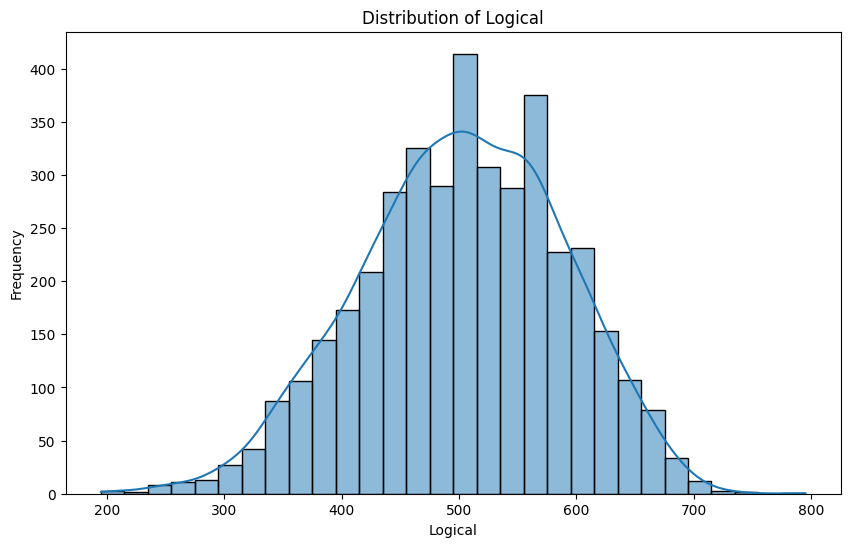

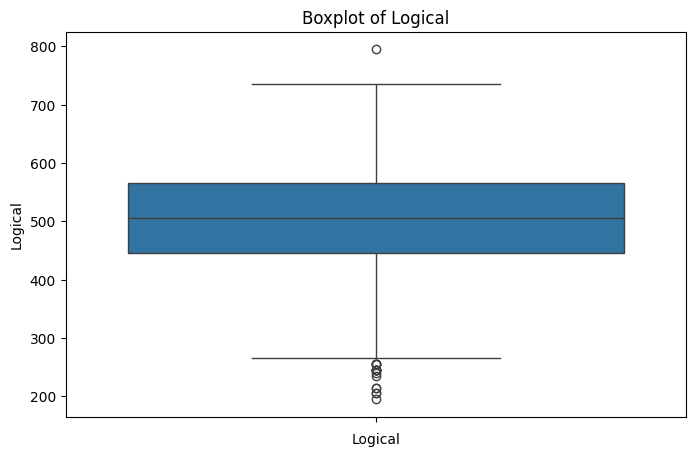

Number of outliers in Logical: 18


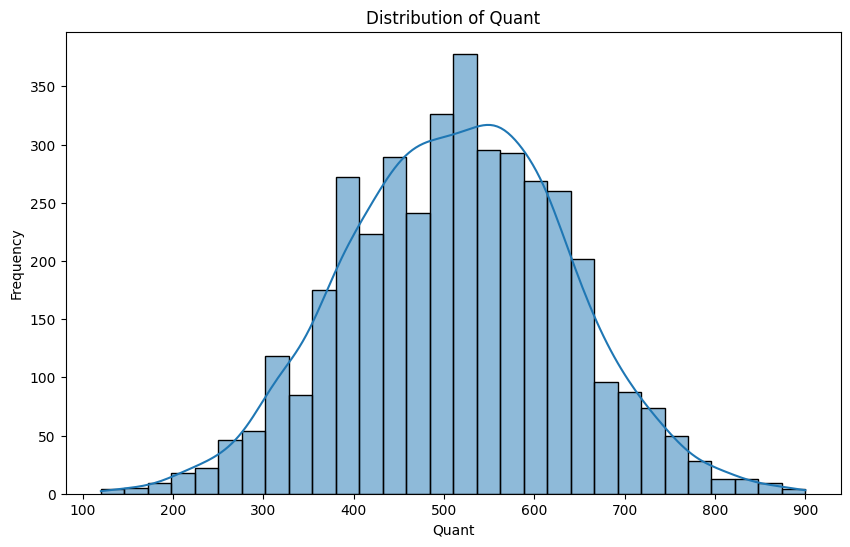

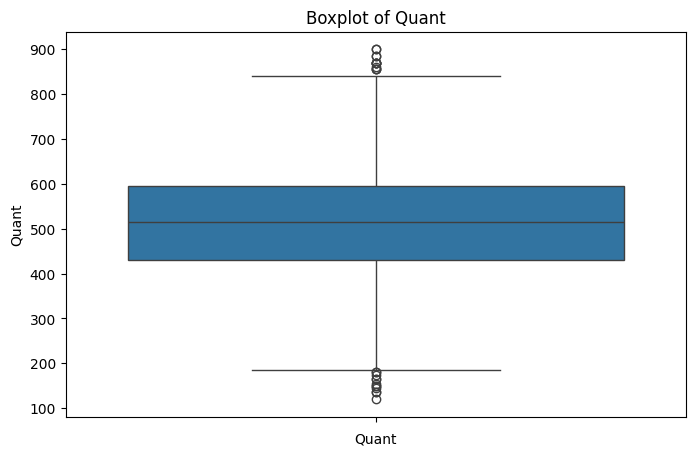

Number of outliers in Quant: 25


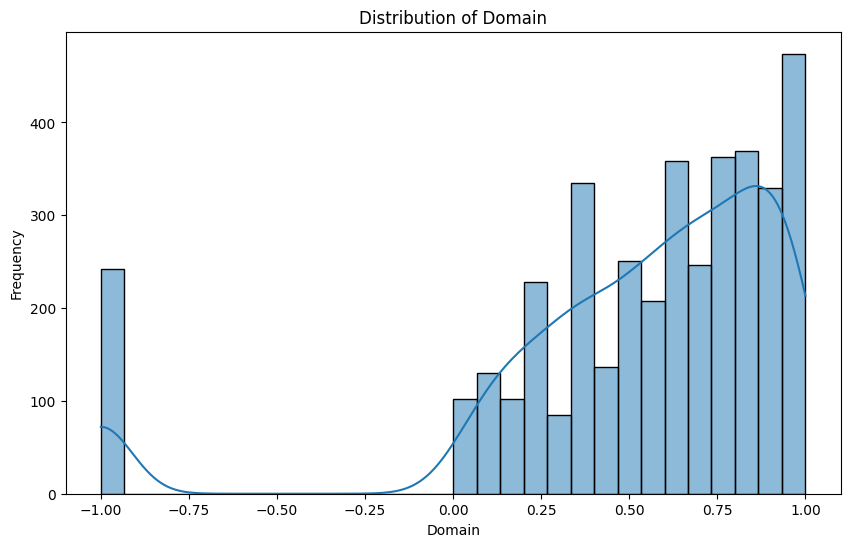

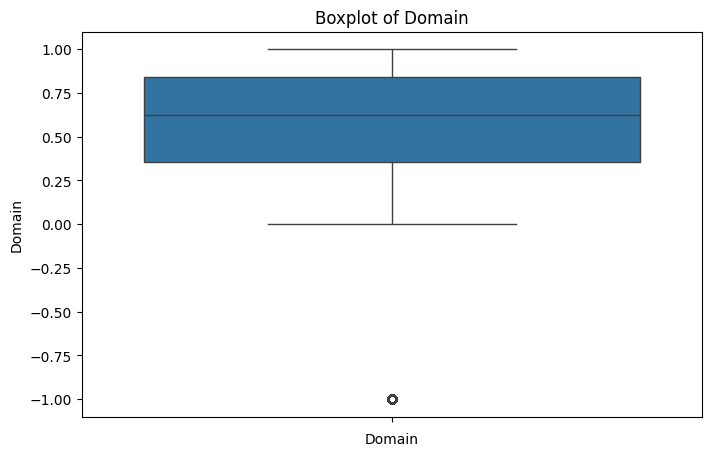

Number of outliers in Domain: 242


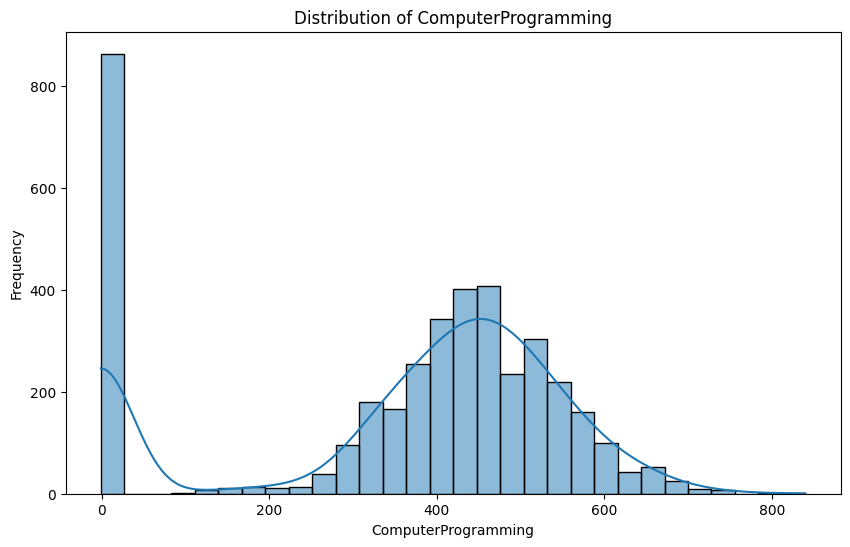

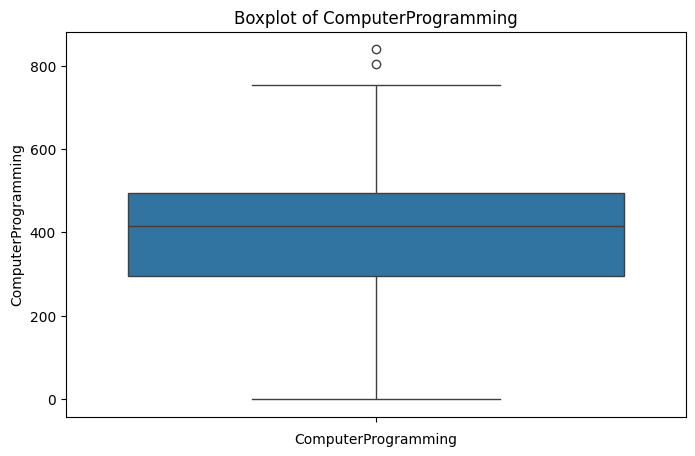

Number of outliers in ComputerProgramming: 2


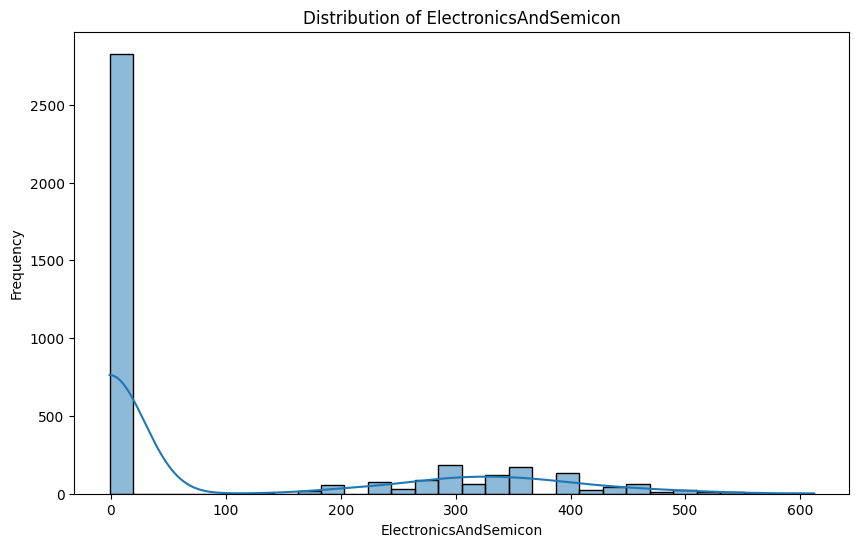

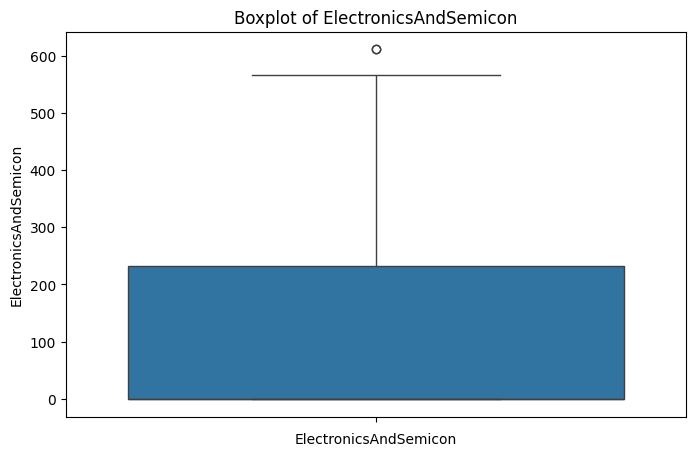

Number of outliers in ElectronicsAndSemicon: 2


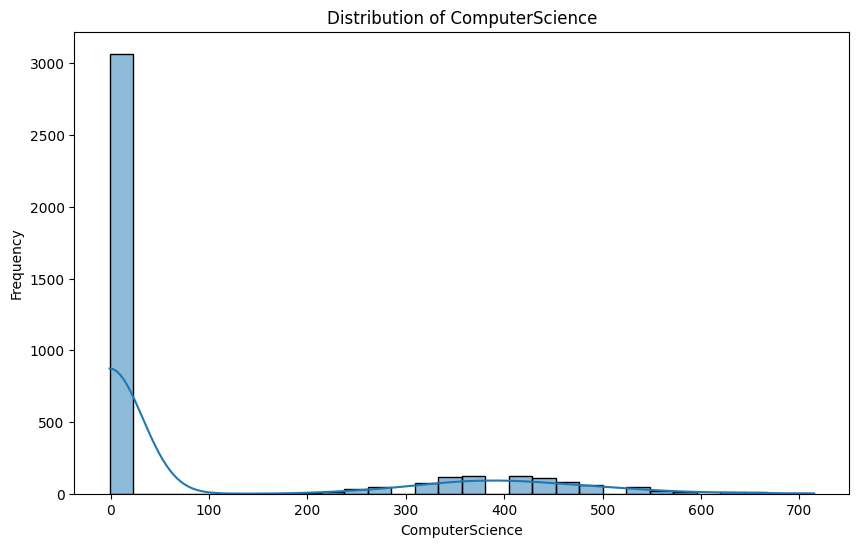

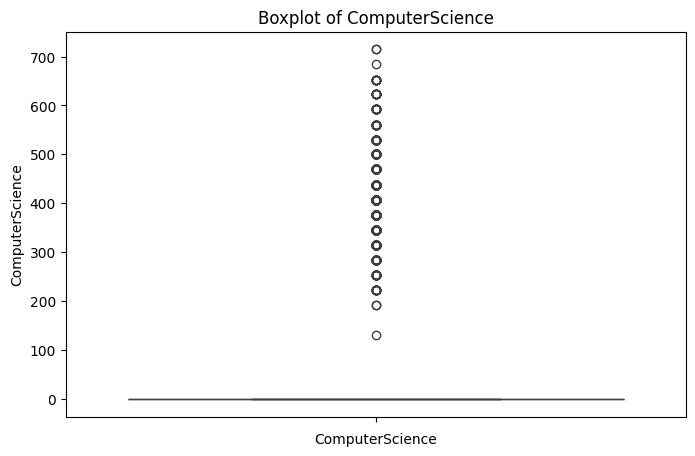

Number of outliers in ComputerScience: 891


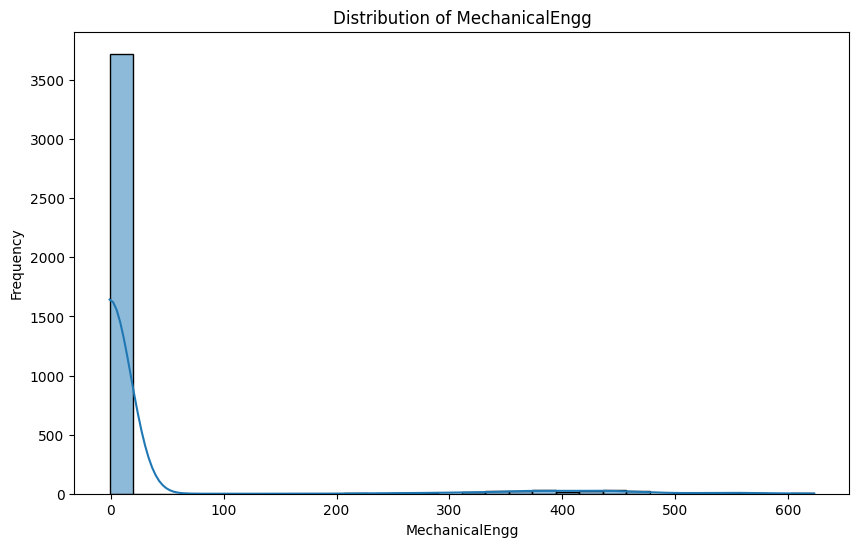

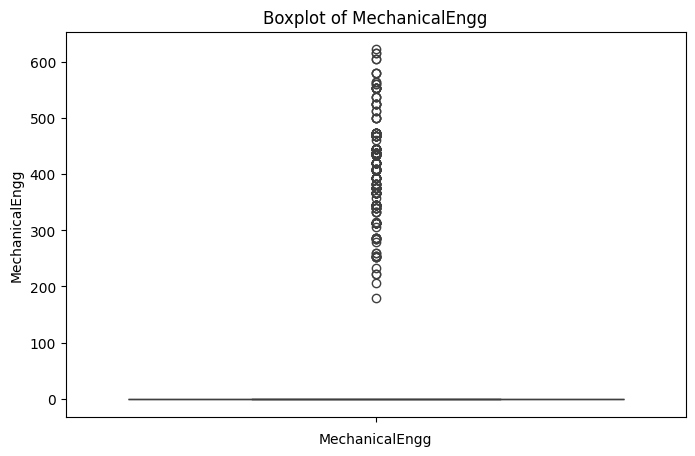

Number of outliers in MechanicalEngg: 235


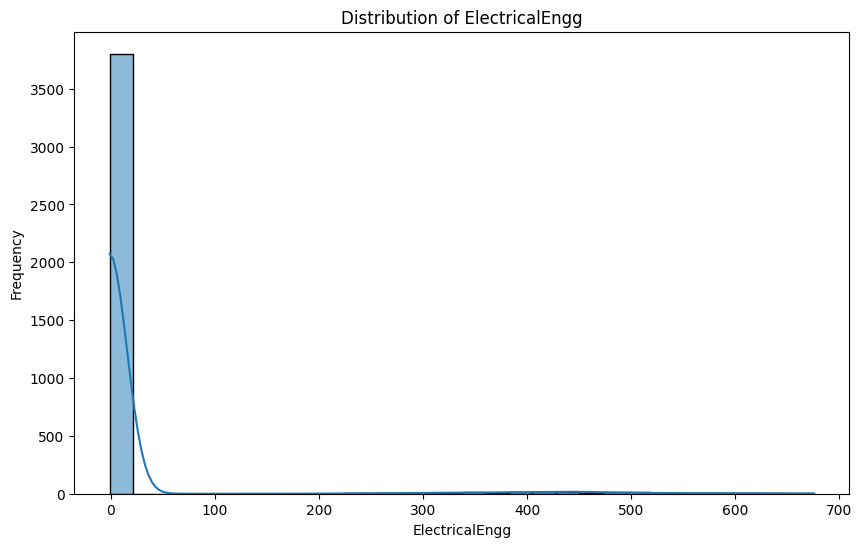

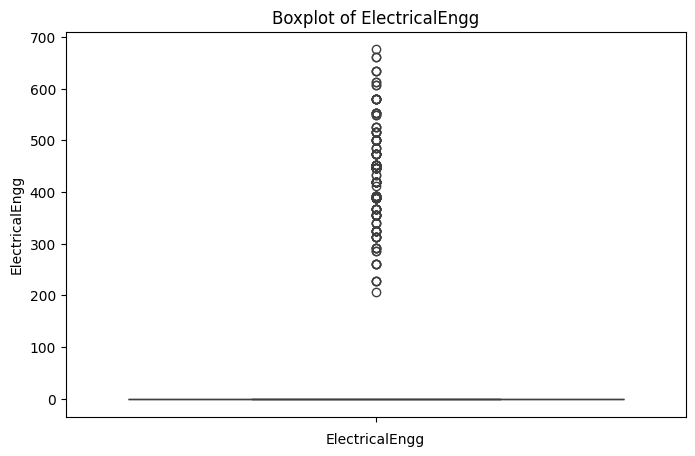

Number of outliers in ElectricalEngg: 156


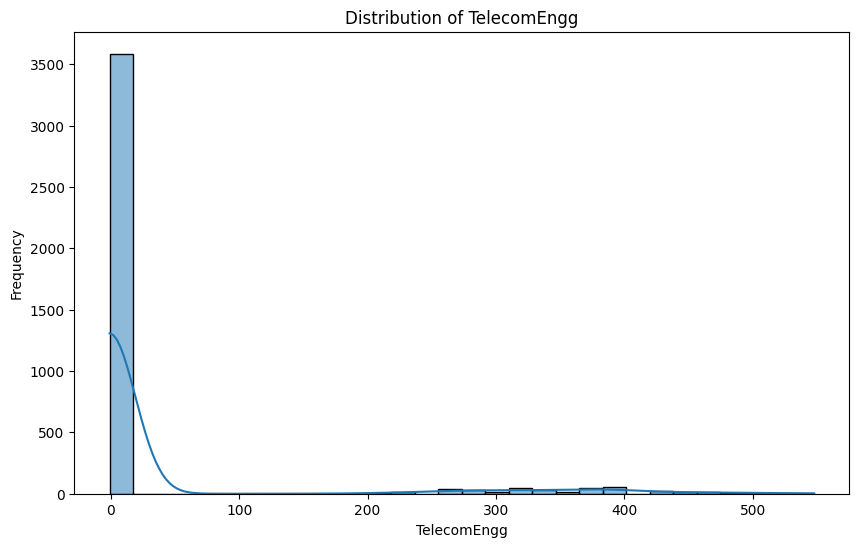

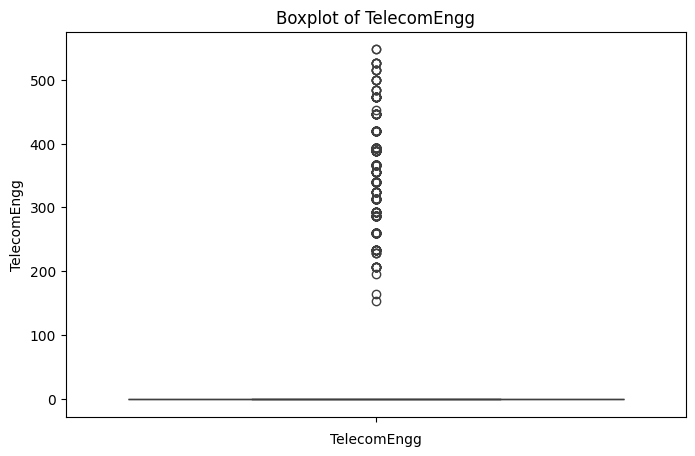

Number of outliers in TelecomEngg: 372


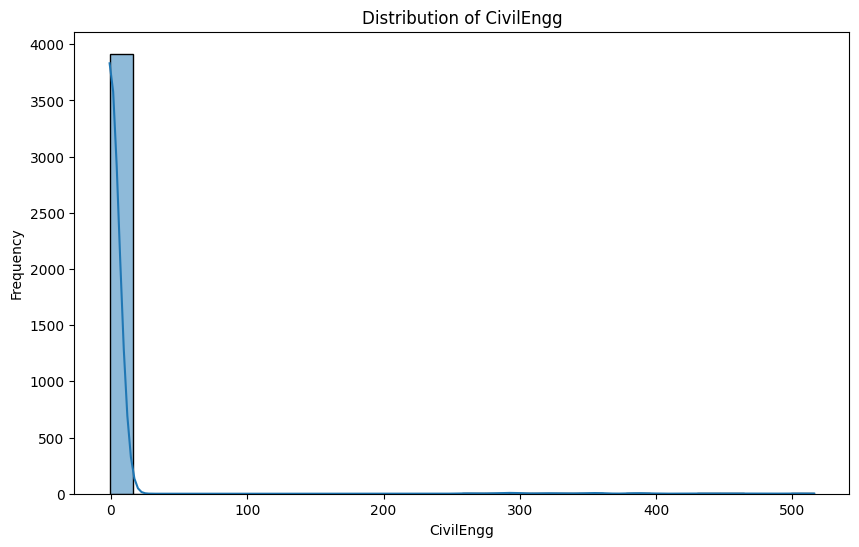

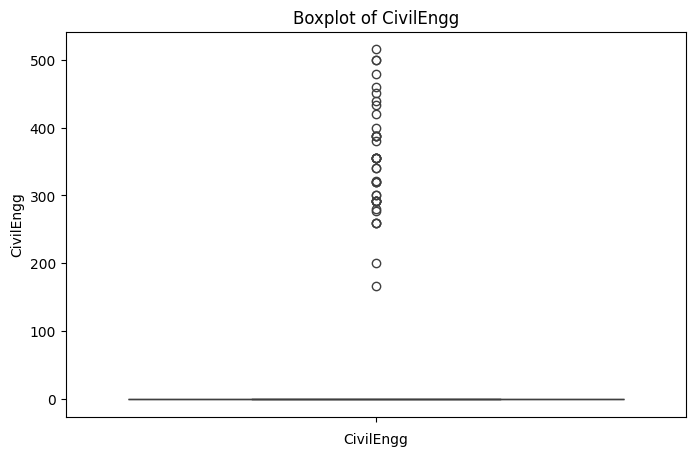

Number of outliers in CivilEngg: 42


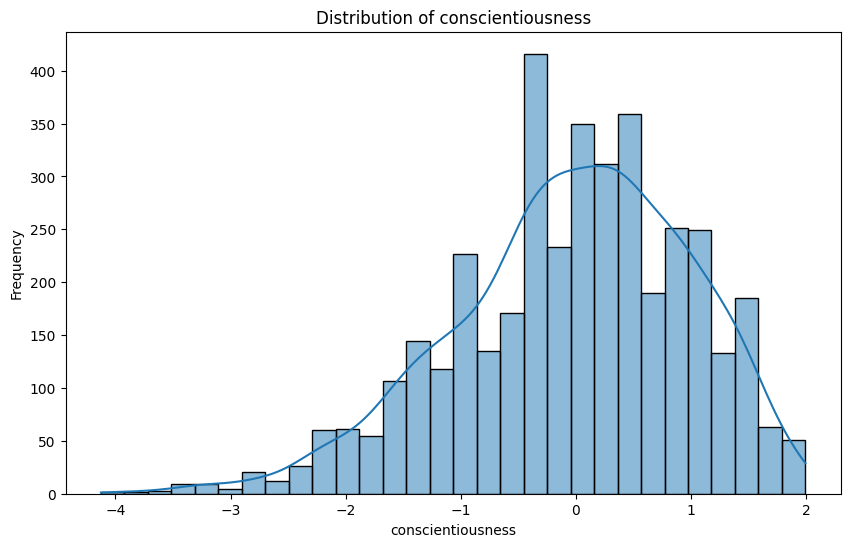

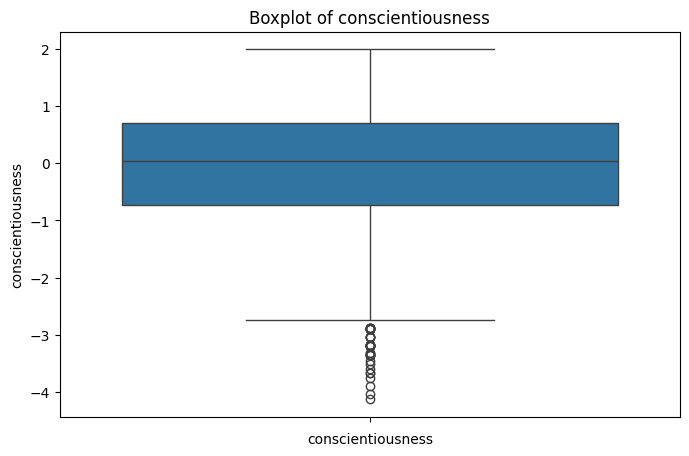

Number of outliers in conscientiousness: 38


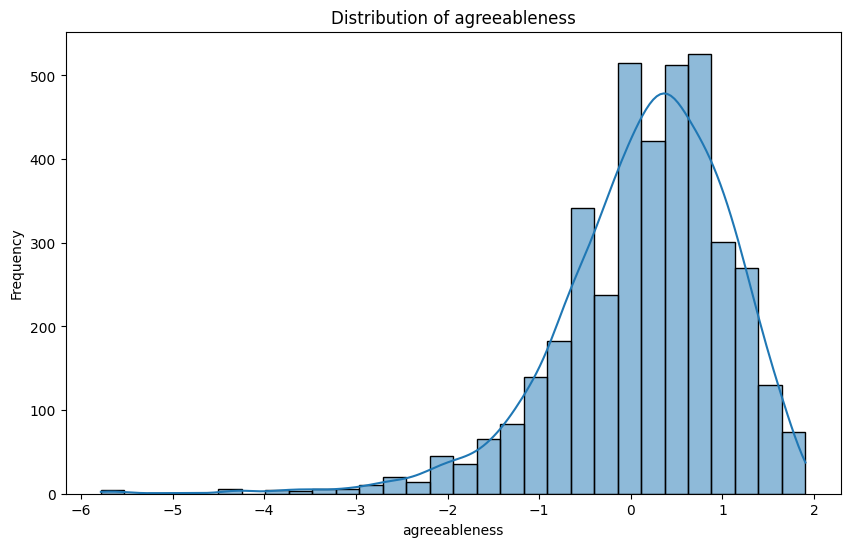

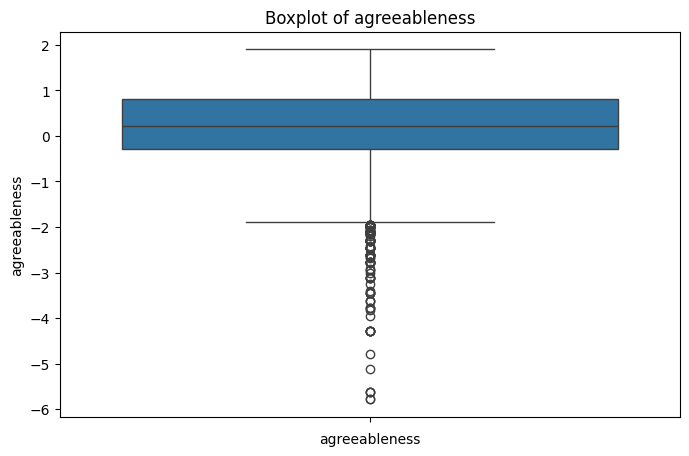

Number of outliers in agreeableness: 123


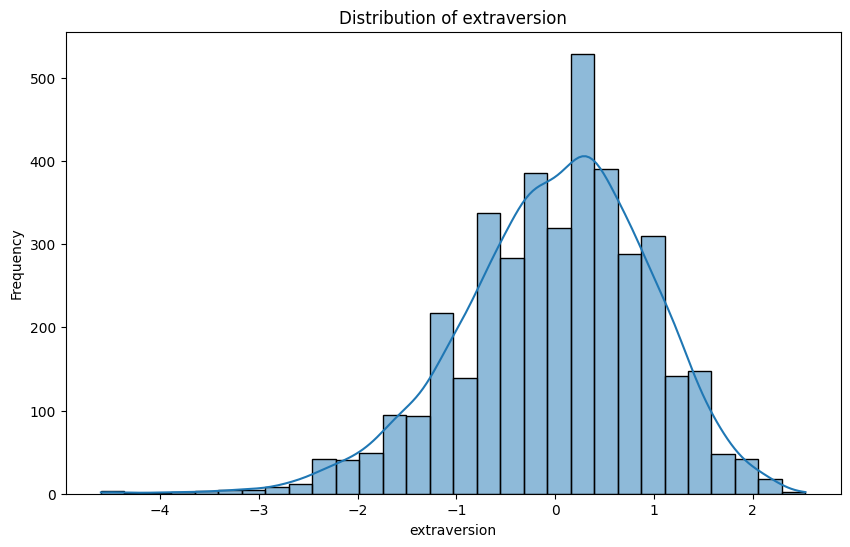

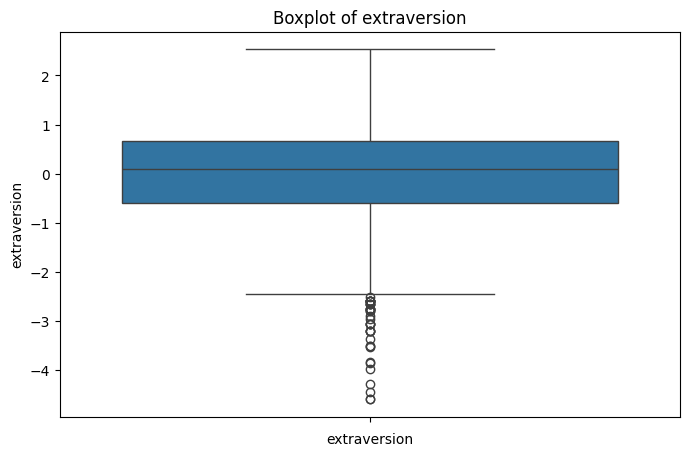

Number of outliers in extraversion: 40


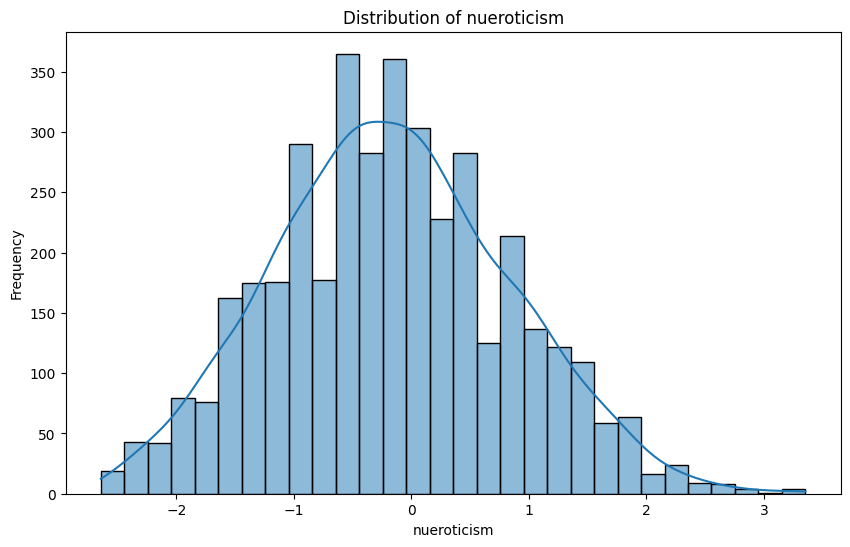

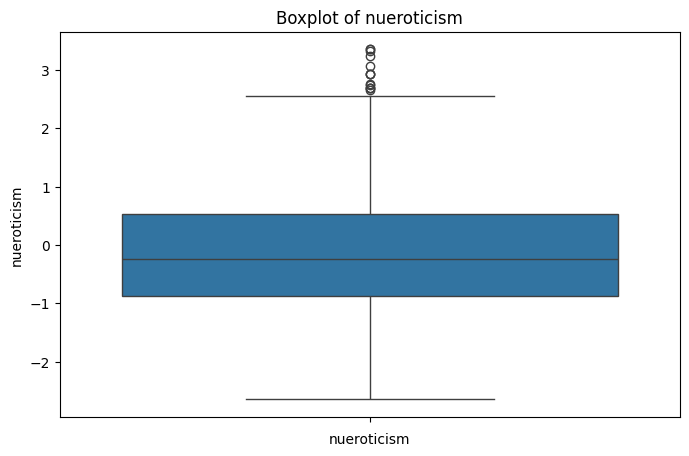

Number of outliers in nueroticism: 14


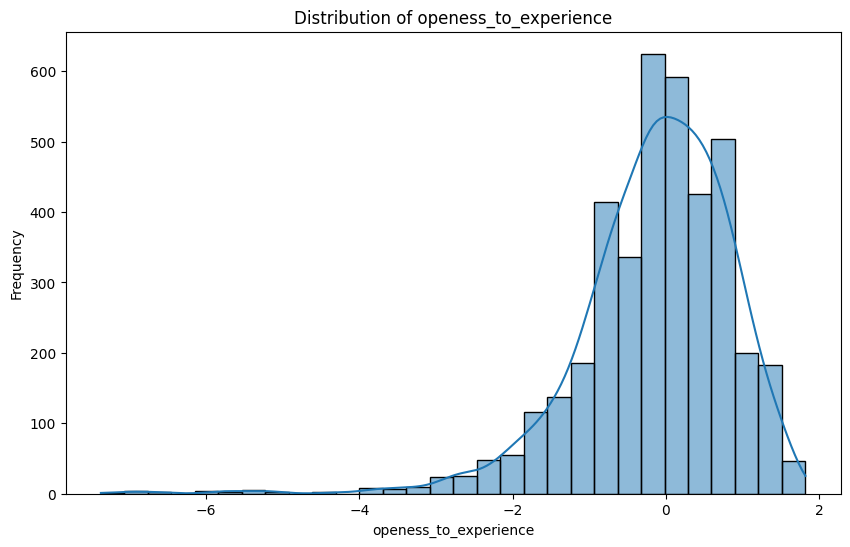

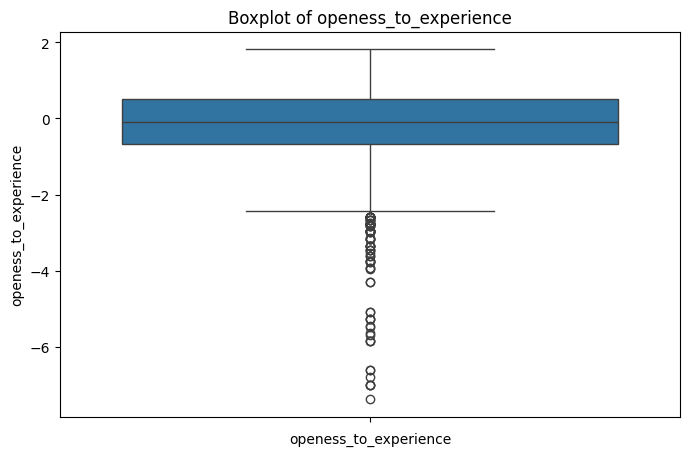

Number of outliers in openess_to_experience: 94


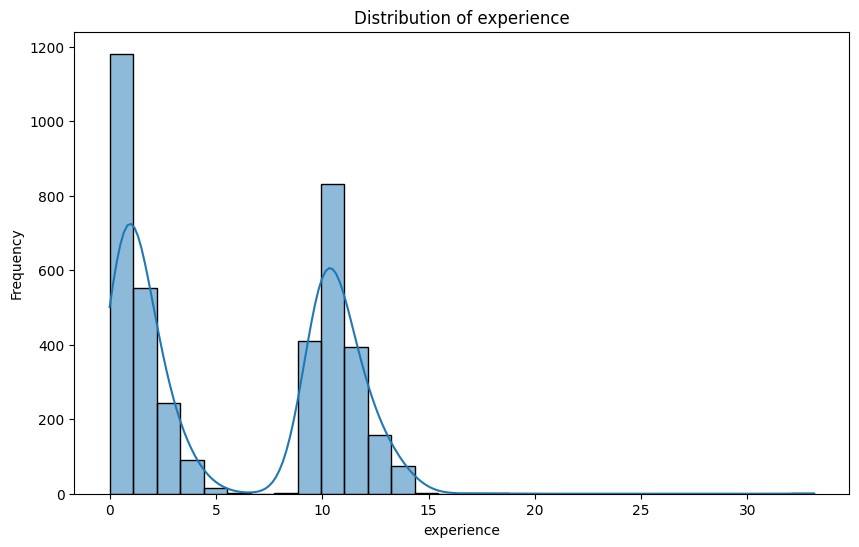

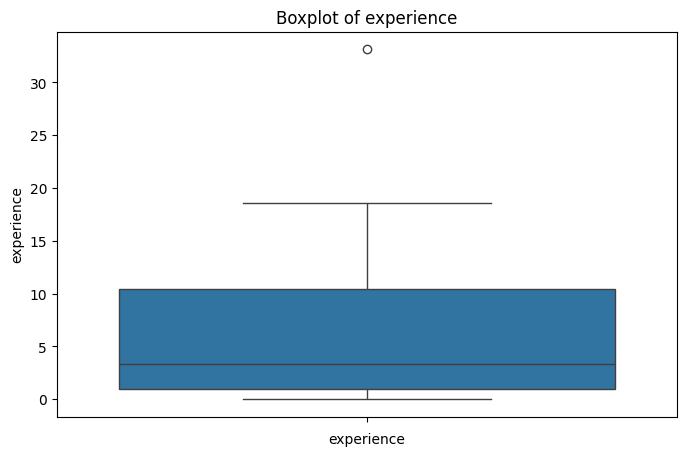

Number of outliers in experience: 1


In [154]:
# Univariate analysis for numerical columns
for column in numerical_columns:
    if column in ['ID' , 'CollegeCityID','GraduationYear','12graduation']:
        continue

    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

    # Finding outliers
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Number of outliers in {column}: {len(outliers)}")

In above **univariate Numerical plots** -- plots were plotted for salary , 10percentage , 12percentage and all section marks distributions individually out of which marks section columns has -1 that indicates that the student/person have not opted for that particular section .
Out of above plots some general observations are :

-  **Salary** column has got more number of observations in 35,000 to 50,000 with maximum salary at 40,00,000 and minimum at 35,000
-  **10percentage , 12percentage** in these columns there are no unreasonable outliers like more than 100%
-  ( **A small assumption** ) In collegeGPA column there are only some values that are actually provided in 10 GPA scale but many others GPAs are filled in percentage format so these GPA values can also be converted to percentages to be on same scale with other values .(**This is performed below**)
-  **English , Logical , Quant , conscientiousness , agreeableness , extraversion , neuroticism , openess_to_experience** .... these sections are mostly common for everyone
-  **Domain , ComputerProgramming , ElectronicsAndSemicon , ComputerScience , MechanicalEngg , ElectricalEngg , TelecomEngg , CivilEngg**  .... In these sections '-1' indicated that the student/person have not opted for that particular section .
-  **experience** column plot can be seen with an outlier at around 33 which is also max and min of 0 . There are more number of people with experience around 3 to 10 .


In [155]:
data['experience'].describe()

count    3958.000000
mean        5.800542
std         4.879503
min         0.000000
25%         0.999316
50%         3.331964
75%        10.392882
max        33.141684
Name: experience, dtype: float64

In [156]:
data[['Domain' , 'ComputerProgramming' , 'ElectronicsAndSemicon' , 'ComputerScience' , 'MechanicalEngg' , 'ElectricalEngg' , 'TelecomEngg' , 'CivilEngg']].describe()

,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
count,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000
mean,0.512228,352.919404,95.219303,90.651592,23.217029,16.086155,32.004295,2.721071
std,0.467977,205.805997,158.331531,175.333064,98.588251,86.623399,105.080590,36.841443
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.356536,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000


In [157]:
data[['English' , 'Logical' , 'Quant' , 'conscientiousness' , 'agreeableness' , 'extraversion' , 'nueroticism' , 'openess_to_experience']].describe()

,English,Logical,Quant,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000
mean,501.592471,501.607377,513.359272,-0.040113,0.144828,-0.001104,-0.169251,-0.140694
std,104.935965,86.769459,122.227017,1.027492,0.942313,0.952860,1.006326,1.007413
min,180.000000,195.000000,120.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,425.000000,445.000000,430.000000,-0.726400,-0.287100,-0.604800,-0.868200,-0.669200
50%,500.000000,505.000000,515.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,570.000000,565.000000,595.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,875.000000,795.000000,900.000000,1.995300,1.904800,2.535400,3.352500,1.822400


## **Univariate Analysis on Categorical Columns**

In [158]:
categorical_columns

Index(['DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB', '10board',
       '12board', 'CollegeTier', 'Degree', 'Specialization', 'CollegeCityID',
       'CollegeCityTier', 'CollegeState', '10board_processed',
       '12board_processed'],
      dtype='object')

Column: Gender
Number of unique values: 2
Value counts:  Gender
m    3009
f     949
Name: count, dtype: int64




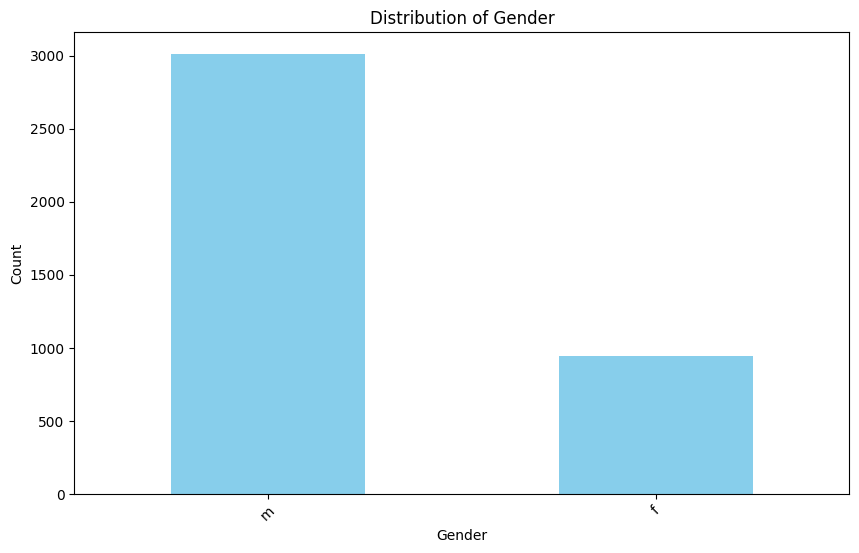

Column: CollegeTier
Number of unique values: 2
Value counts:  CollegeTier
2    3662
1     296
Name: count, dtype: int64




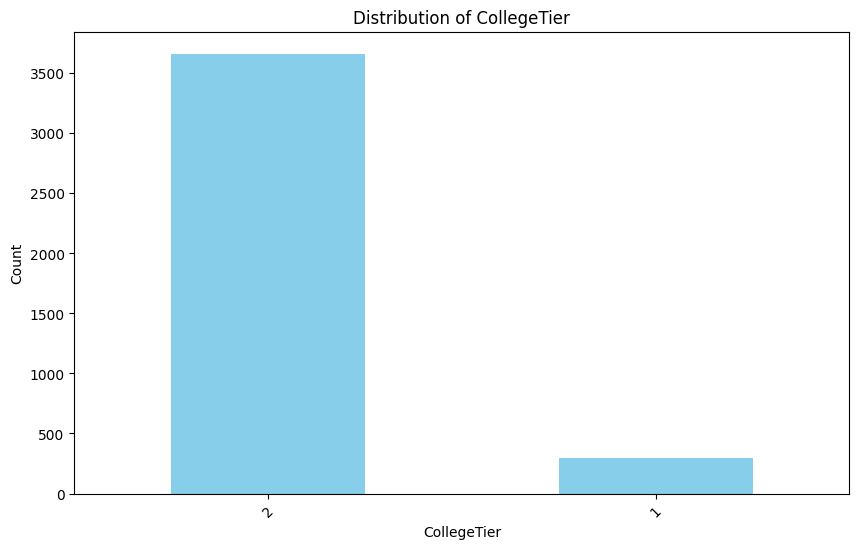

Column: Degree
Number of unique values: 4
Value counts:  Degree
B.Tech/B.E.      3663
MCA               240
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: count, dtype: int64




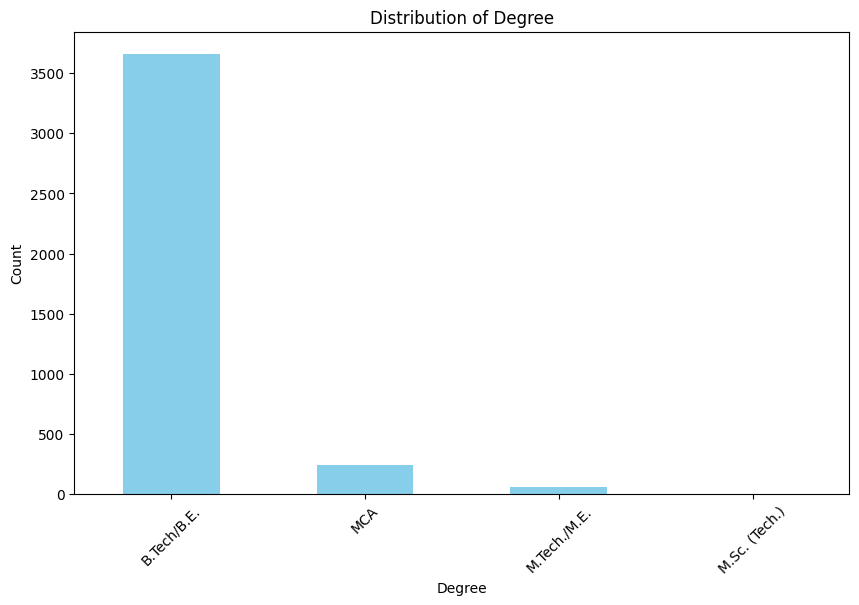

Column: Specialization
Number of unique values: 24
Value counts:  Specialization
computers                            1582
electronics                          1010
information technology                687
mechanical                            207
electronics and electrical            192
electrical                             82
Instrumentation                        52
electronics & instrumentation          41
civil engineering                      29
biotechnology                          15
industrial engineering                 13
other                                  13
chemical engineering                    8
telecommunication engineering           6
automobile/automotive engineering       5
mechatronics                            4
aeronautical engineering                3
metallurgical engineering               2
biomedical engineering                  2
ceramic engineering                     1
embedded systems technology             1
polymer technology                   

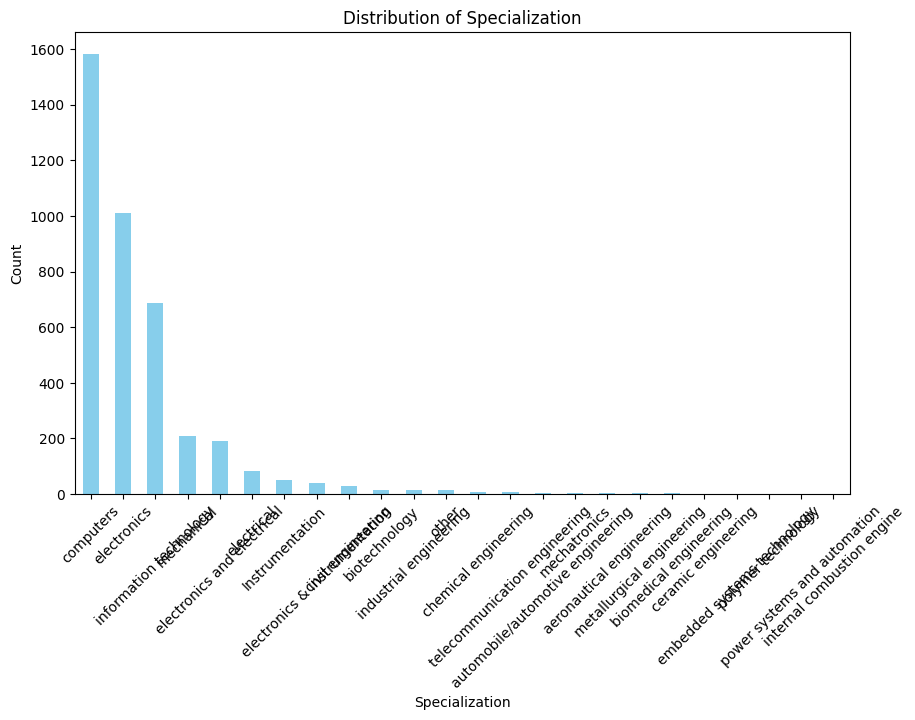

Column: CollegeCityTier
Number of unique values: 2
Value counts:  CollegeCityTier
0    2769
1    1189
Name: count, dtype: int64




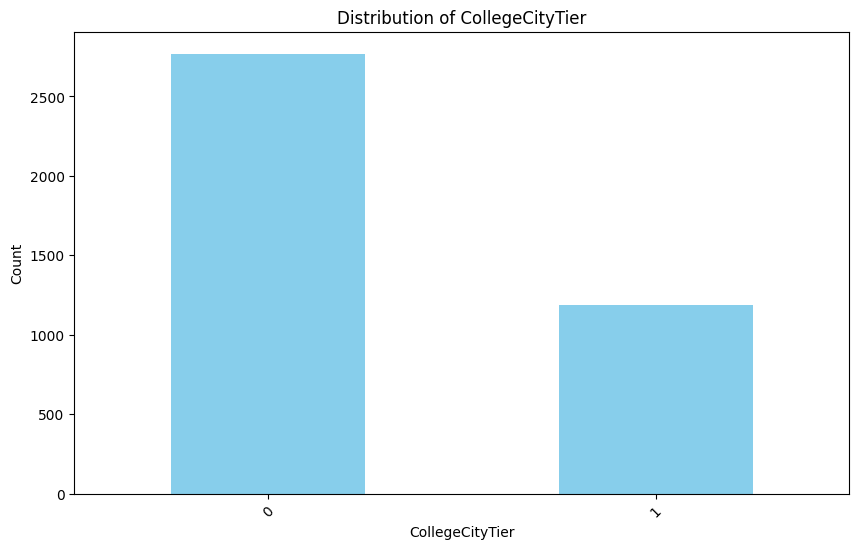

Column: CollegeState
Number of unique values: 26
Value counts:  CollegeState
Uttar Pradesh        905
Karnataka            369
Tamil Nadu           363
Telangana            314
Maharashtra          260
Andhra Pradesh       223
West Bengal          195
Madhya Pradesh       189
Punjab               189
Haryana              177
Orissa               172
Rajasthan            170
Delhi                161
Uttarakhand          112
Kerala                33
Jharkhand             27
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Goa                    1
Meghalaya              1
Name: count, dtype: int64




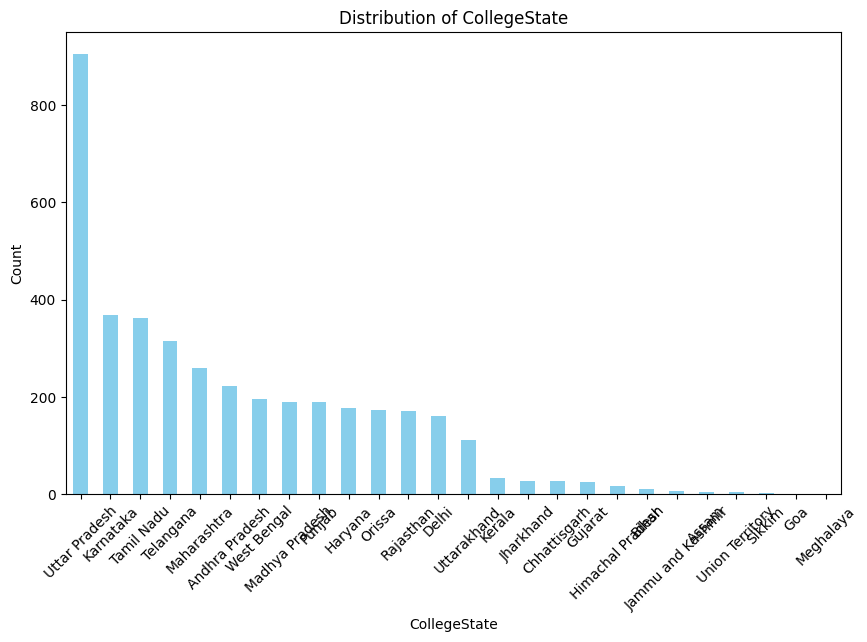

In [159]:
for col in categorical_columns:
  if data[col].nunique()<50:
    print(f"Column: {col}")
    print(f"Number of unique values: {data[col].nunique()}")
    print(f"Value counts: ",data[col].value_counts())
    print("\n")

    # Plotting the value counts
    plt.figure(figsize=(10, 6))
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Univariate plots were plotted for categorical columns which are having less number of classes in it to make the plots understandable . For those columns unique elements and their value counts were also shown in between plots. Out of this some observations are :     
- There are **more male (3009) candidates than female (949)** candidates
- **CollegeTier  '2'** count ( 3662) is more than **'1'** count ( 296)
- **Degree** .. most people are from B.Tech/B.E. (3663)
- **Specialization** .... top preferred specializations are **'computers', 'electronics','information technology'**
- **CollegeCityTier** -- 0 count is more than 1 count
- **CollegeState** -- top 4 CollegeStates from where people appeared for the exam are **Uttar Pradesh > Karnataka > Tamil Nadu > Telangana**

Many other observations can be seen

## **Bivariate Analysis between numerical and numerical columns**

In [160]:
data.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       '10board_processed', '12board_processed', 'experience'],
      dtype='object')

In [161]:
numerical_columns

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'collegeGPA', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'experience'],
      dtype='object')

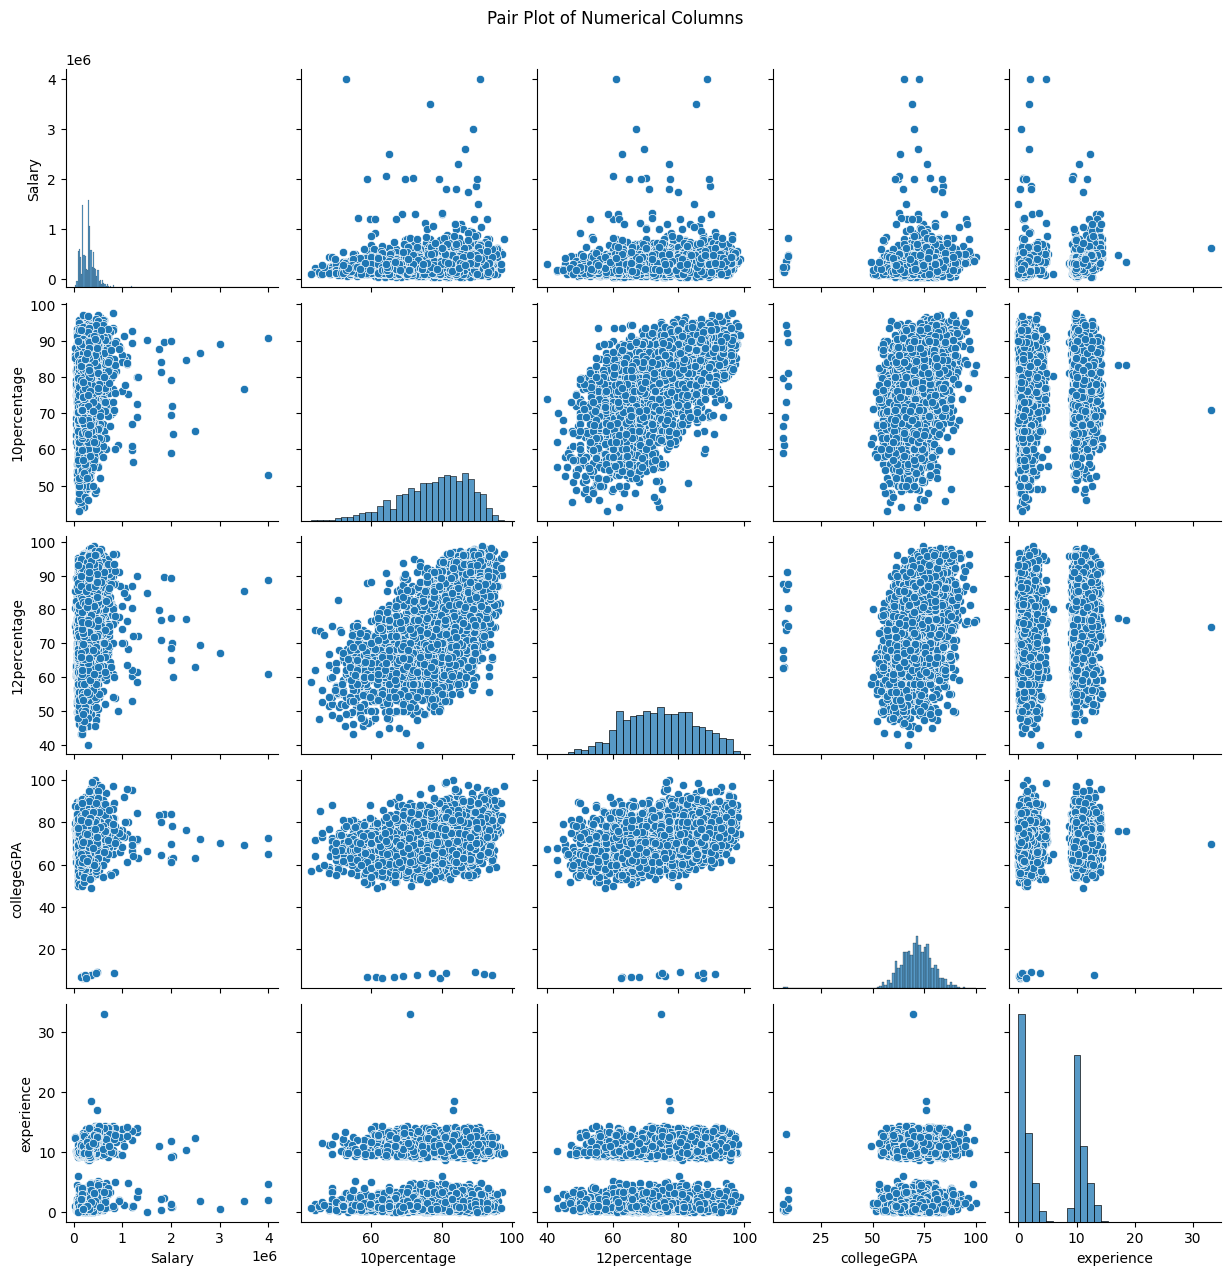

In [162]:
sns.pairplot(data[['Salary', '10percentage', '12percentage', 'collegeGPA', 'experience']])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()

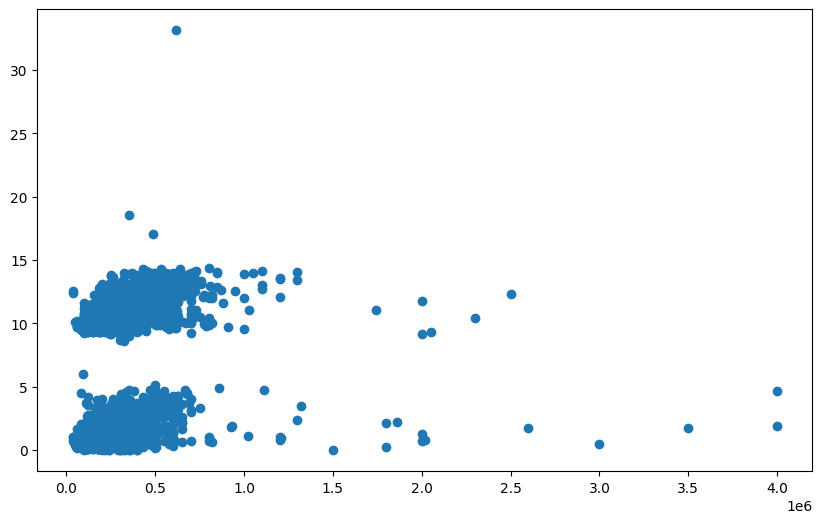

In [163]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Salary'],data['experience'])
plt.show()

In [164]:
data[data['experience']==data['experience'].max()]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,10board_processed,12board_processed,experience
2853,611964,615000.0,1991-06-01,2024-07-22,quality assurance test engineer,noida,f,1991-06-18,71.0,state board,...,-1,-1,-1.8825,-2.7846,-0.1437,0.9066,-1.0524,state board,state board,33.141684


In [165]:
data[['Salary', '10percentage', '12percentage', 'collegeGPA', 'experience']].corr()

,Salary,10percentage,12percentage,collegeGPA,experience
Salary,1.000000,0.176111,0.168387,0.131170,0.241564
10percentage,0.176111,1.000000,0.642804,0.312301,0.141158
12percentage,0.168387,0.642804,1.000000,0.345299,0.132505
collegeGPA,0.131170,0.312301,0.345299,1.000000,0.110400
experience,0.241564,0.141158,0.132505,0.110400,1.000000


### Here as **" Salary "** is the main target , from above plots and correlation table not much dependency or correlation of salary can be seen with other numerical columns individually . There is a very little dependency on **'experience'** column

In [166]:
categorical_columns

Index(['DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB', '10board',
       '12board', 'CollegeTier', 'Degree', 'Specialization', 'CollegeCityID',
       'CollegeCityTier', 'CollegeState', '10board_processed',
       '12board_processed'],
      dtype='object')

In [167]:
data['Designation'].nunique()

383

In [168]:
numerical_columns

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'collegeGPA', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'experience'],
      dtype='object')

## **Bivariate Analysis between numerical and categorical columns**

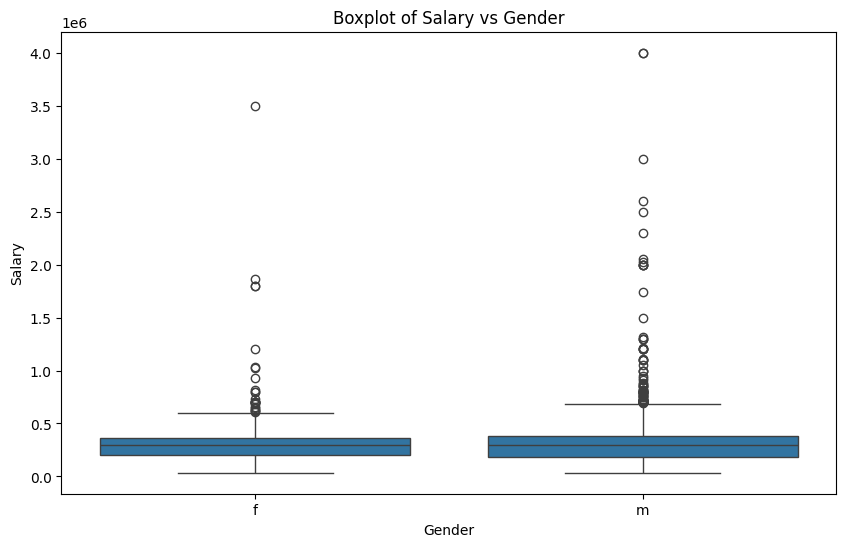

In [169]:
# Example: Boxplot of Salary vs Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=data)
plt.title('Boxplot of Salary vs Gender')
plt.show()

In [170]:
data.Gender.value_counts()

Gender
m    3009
f     949
Name: count, dtype: int64

In [171]:
data.groupby('Gender')['Salary'].mean()

Gender
f    296048.472076
m    312414.091060
Name: Salary, dtype: float64

### *Salaries are almost in same ranges for both male and female candidates . Female candidates have shown almost equal capacity in acquiring good salaries .*

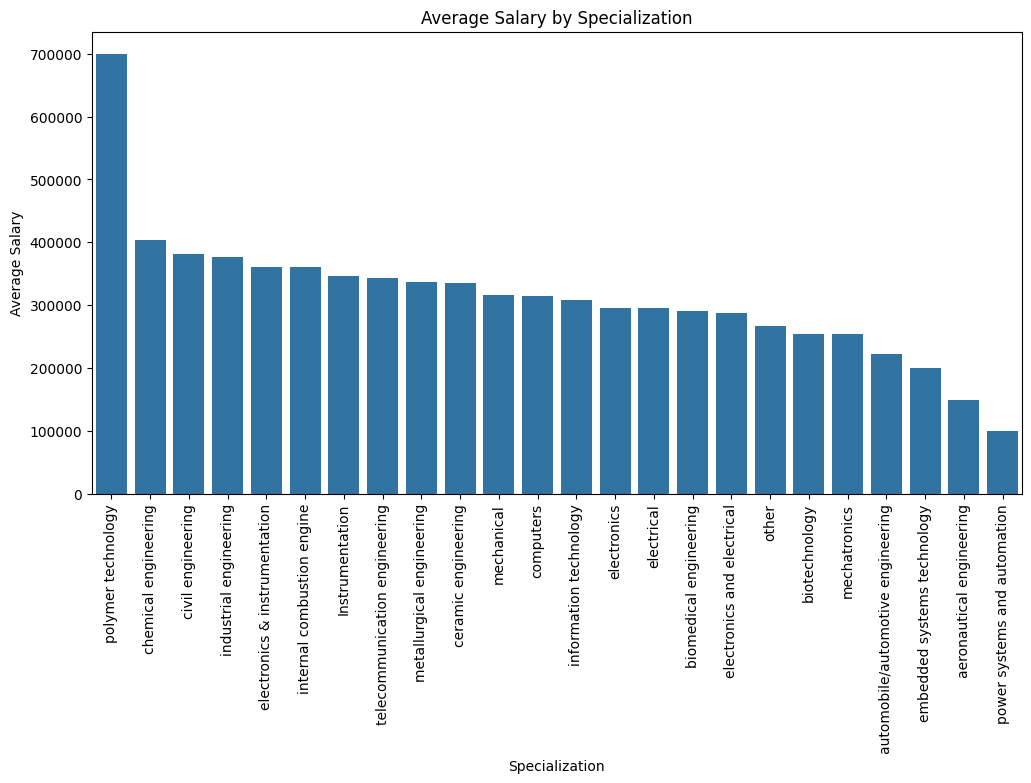

In [172]:
# Barplot of Average Salary by Specialization

avg_salary_by_specialization = data.groupby('Specialization')['Salary'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_salary_by_specialization.index, y=avg_salary_by_specialization.values)
plt.xticks(rotation=90)
plt.title('Average Salary by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Average Salary')
plt.show()

### *from above plot highest average salary can be observed in people from **Polymer Technology** Specialization*

In [173]:
data[data['Specialization']=='polymer technology']

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,10board_processed,12board_processed,experience
990,962376,700000.0,2014-07-01,2024-07-22,product manager,jaipur,m,1992-01-03,87.4,cbse,...,-1,-1,-0.3027,-0.4536,-0.6048,-0.8682,0.0973,cbse,state board,10.058864


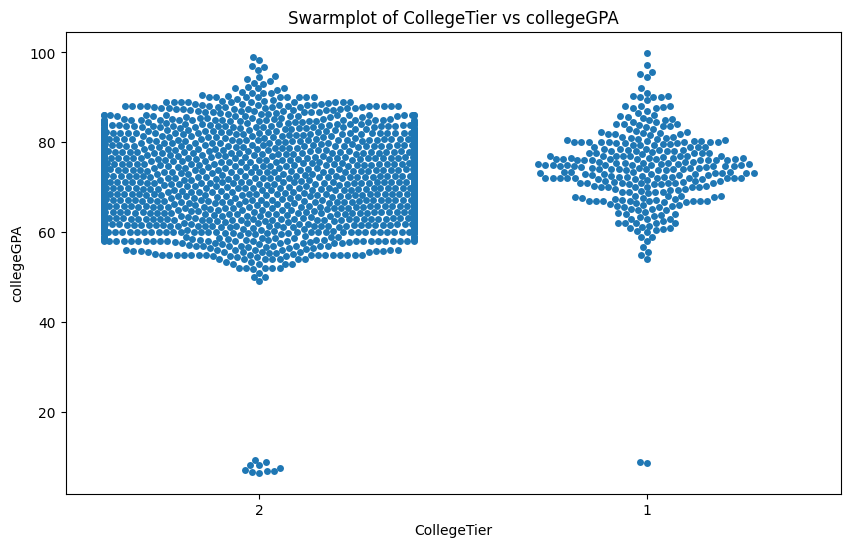

In [174]:
# Swarmplot of CollegeTier vs collegeGPA

plt.figure(figsize=(10, 6))
sns.swarmplot(x='CollegeTier', y='collegeGPA', data=data)
plt.title('Swarmplot of CollegeTier vs collegeGPA')
plt.show()

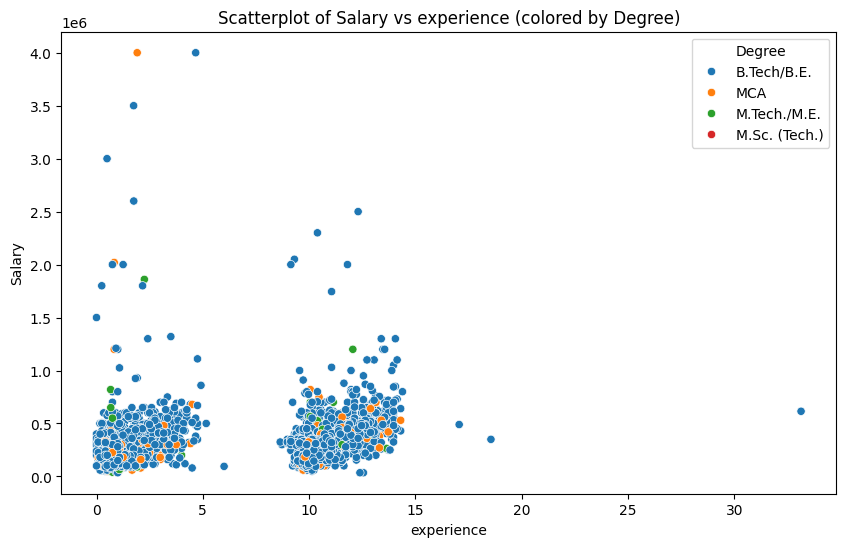

In [175]:
# Scatterplot of Salary vs experience, colored by Degree

plt.figure(figsize=(10, 6))
sns.scatterplot(x='experience', y='Salary', hue='Degree', data=data)
plt.title('Scatterplot of Salary vs experience (colored by Degree)')
plt.show()

### *From above plot it can be clearly seen that the **salary** is not that dependant on **Degree** and also not much dependant on **experience** .*

## **Bivariate plot between categorical and categorical columns**

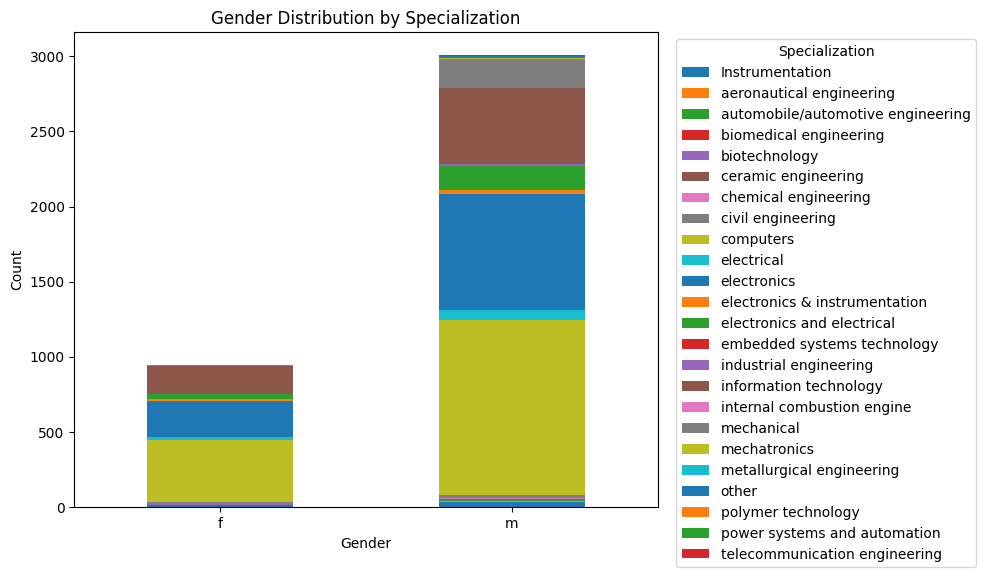

In [176]:
# Count frequencies of Gender-Specialization combinations
gender_spec_counts = data.groupby(['Gender', 'Specialization']).size().unstack()

# Plot stacked bar chart
ax = gender_spec_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender Distribution by Specialization')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Move the legend outside of the plot area
plt.legend(title='Specialization', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

### *Higher portion of people can be seen from Specializations related to **computers** followed by **electronics , information technology** in both males and females*

# **Research Questions**

### **1. Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.**


In [177]:
df = pd.read_csv('/content/data.csv')
df[df.Specialization.isin(['computer engineering', 'computer science & engineering','computer science and technology', 'computer science' ,
                           'computer and communication engineering'])].shape

(1353, 39)

---- The above code block shows the count of observations with mentioned specializations from raw dataset but here I am using data from preprocessed dataset

In [178]:
# filtered elements in designation into a list 'roles' as per the research question

roles = ['assistant engineer','ase','assistant software engineer','associate engineer','associate software engineer','embedded engineer','embedded software engineer',
          'hardware engineer','java software engineer','jr. software engineer','junior software engineer','principal software engineer','program analyst trainee',
         'programmer','programmer analyst','programmer analyst trainee','senior software engineer','software engineer','software engineer analyst','software engineer associate',
         'software engineer trainee','software engineering associate','software trainee engineer','trainee software engineer']

In [179]:
data[['Degree','Specialization','Designation']].nunique()

Degree              4
Specialization     24
Designation       383
dtype: int64

In [180]:
cs_engineers = data[data['Degree'].isin(['B.Tech/B.E.','M.Tech./M.E.'])][data.Designation.isin(roles)][data.Specialization=='computers']
cs_engineers.shape

(442, 40)

In [181]:
cs_engineers.GraduationYear.unique()

array([2011, 2014, 2012, 2010, 2013, 2016, 2009, 2015])

### considering candidates who **graduated in [2014,2015,2016]** as **fresh graduates** to check the Times of India Claim made in 2019

In [182]:
cs_engineers = cs_engineers[cs_engineers.GraduationYear.isin([2014,2015,2016])]
cs_engineers.shape

(130, 40)

In [183]:
mean_salary = cs_engineers['Salary'].mean()
median_salary = cs_engineers['Salary'].median()
max_salary = cs_engineers['Salary'].max()
min_salary = cs_engineers['Salary'].min()

print(f"Mean Salary: ₹{mean_salary:.2f}")
print(f"Median Salary: ₹{median_salary:.2f}")
print(f"Maximum Salary: ₹{max_salary:.2f}")
print(f"Minimum Salary: ₹{min_salary:.2f}")

Mean Salary: ₹351076.92
Median Salary: ₹315000.00
Maximum Salary: ₹2050000.00
Minimum Salary: ₹50000.00


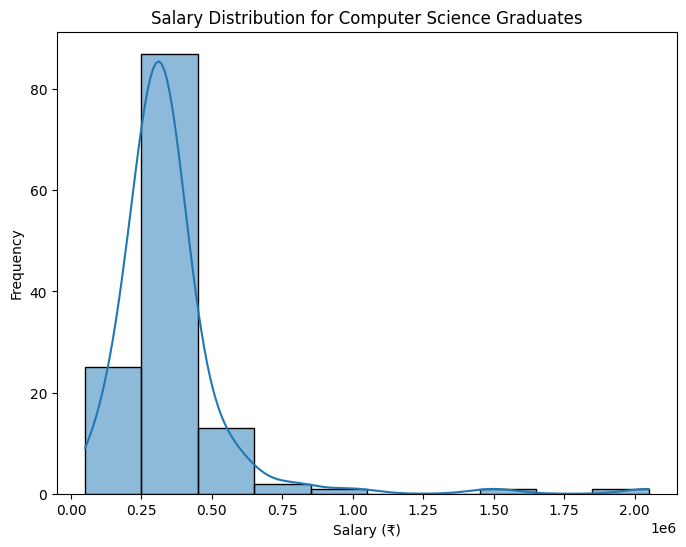

In [184]:
# Visualize salary distribution for cs_engineers

plt.figure(figsize=(8, 6))
sns.histplot(cs_engineers['Salary'], bins=10, kde=True)
plt.title('Salary Distribution for Computer Science Graduates')
plt.xlabel('Salary (₹)')
plt.ylabel('Frequency')
plt.show()

In [185]:
print('Number of rows: ', cs_engineers['Salary'].shape[0])
print('Population Mean: ', cs_engineers['Salary'].mean())

Number of rows:  130
Population Mean:  351076.92307692306


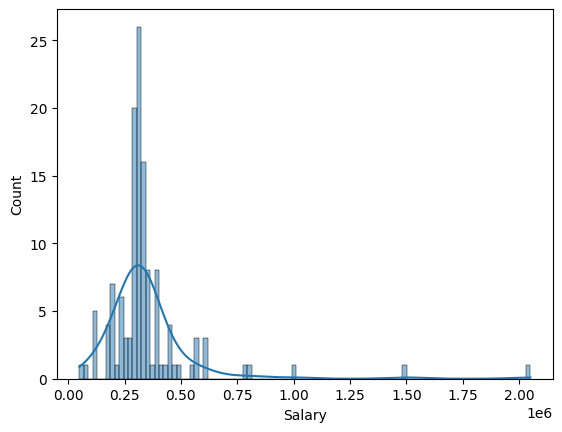

In [186]:
sns.histplot(cs_engineers['Salary'], kde=True)
plt.show()

In [187]:
def sampling_distribution(data, sample_size, number_of_sample):
    sample_means = []
    for m in range(number_of_sample):
        sample = data.sample(n=sample_size)
        sample_means.append((sample_size, sample.mean()))
    sampling_distribution_df = pd.DataFrame(sample_means, columns=['n', 'mean'])

    print("*"*20, " R E P O R T ", "*"*20)
    print("Mean Check")
    print("Sampling Distribution Mean:", sampling_distribution_df["mean"].mean())
    print("Population Mean: ", data.mean())

    print()
    print("Standard Deviation Check")
    print("Sampling Distribution Std:", sampling_distribution_df["mean"].std())
    print("Population Std / (sample_size)**0.5:", data.std()/np.sqrt(sample_size))

    print("*"*55)

    return sampling_distribution_df

In [188]:
def sampling_distribution_plot(data):
    fig, axes = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)

    axes[0].set_title("Sampling Distribution")  # Add a title to the axes
    axes[0].set_xlabel('Mean')  # Add an x-label to the axes
    axes[0].set_ylabel('Density')  # Add a y-label to the axes

    sns.histplot(data, kde=True, ax=axes[0])

    stats.probplot(data, dist=stats.norm, plot=axes[1])
    axes[1].grid()

    plt.show()

********************  R E P O R T  ********************
Mean Check
Sampling Distribution Mean: 349570.0
Population Mean:  351076.92307692306

Standard Deviation Check
Sampling Distribution Std: 38025.67314567644
Population Std / (sample_size)**0.5: 44676.78664983417
*******************************************************


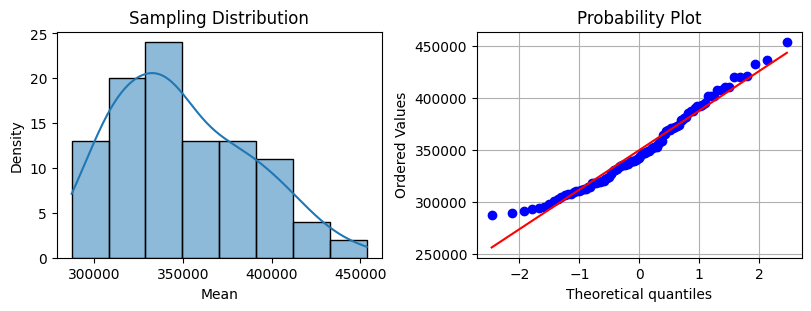

In [189]:
from scipy import stats

n=25
m=100

sampling_distribution_df = sampling_distribution(data=cs_engineers['Salary'], sample_size=n, number_of_sample=m)

sampling_distribution_plot(data=sampling_distribution_df["mean"])

In [190]:
# Step 1: Take a sample
sample_size = 25

sample_df = cs_engineers.sample(n=sample_size, random_state=0)
sample_df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,10board_processed,12board_processed,experience
130,902366,325000.0,2014-09-01,2024-07-22,software engineer,greater noida,m,1992-01-10,82.8,cbse,...,-1,-1,-0.1590,0.0459,0.7785,-1.1218,-0.0943,cbse,cbse,9.889117
1651,913451,330000.0,2014-08-01,2015-04-01,programmer analyst,chennai,m,1992-10-04,86.0,state board,...,-1,-1,0.2718,0.0459,0.3174,0.0192,-0.4776,state board,state board,0.665298
2963,1093269,400000.0,2014-07-01,2024-07-22,software engineer,banagalore,f,1992-11-15,72.0,cbse,...,-1,-1,1.1336,0.5454,0.6248,-0.3612,0.4805,cbse,cbse,10.058864
3256,1250504,400000.0,2014-09-01,2015-02-01,associate software engineer,hyderabad,m,1990-02-25,69.5,state board,...,-1,-1,0.9900,-0.2871,0.7785,-1.6289,-0.8608,state board,state board,0.418891
3099,872338,305000.0,2014-06-01,2015-06-01,software engineer,mumbai,m,1991-06-25,74.0,icse,...,-1,-1,-0.3027,1.3779,1.0859,0.0192,0.4805,icse,icse,0.999316


In [191]:
# Step 2: Calculate sample statistics (i.e. mean and standard deviation of the sample)

sample_mean = np.mean(sample_df['Salary'])
sample_std = np.std(sample_df['Salary'], ddof=1)

# Use ddof=1 for sample standard deviation
# The divisor used in calculations is N - ddof, where N represents the number of elements.
# By default ddof is zero.

print("Sample Mean:", sample_mean)
print("Sample Std:", sample_std)

Sample Mean: 309600.0
Sample Std: 68798.0135372139


In [192]:
# Step 3: Set confidence level (e.g., 95% confidence level)
confidence_level = 0.95

In [193]:
# Step 3a: Calculate standard error (SE)
standard_error = sample_std / np.sqrt(sample_size)

print("Standard Error:", standard_error)

Standard Error: 13759.60270744278


In [194]:
# Step 3b: Calculate the critical value (z-score)
significance_level = 1 - confidence_level

t_score = stats.t.ppf(1 - significance_level/2, df=sample_size-1)

print("t Score:", t_score)

t Score: 2.0638985616280205


In [195]:
# Step 3c: Calculate the margin of error (MOE)
margin_of_error = t_score * standard_error

print("Margin of Error:", margin_of_error)

Margin of Error: 28398.424236464172


In [196]:
# Step 4: Calculate the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: 281201.5757635358
Upper Bound: 337998.4242364642


In [197]:
# Print the results
print(f"Sample Mean: {sample_mean}")
print(f"Margin of Error: {margin_of_error}")
print(f"Confidence Interval ({confidence_level*100}%): ({lower_bound}, {upper_bound})")

print()
print("R E S U L T")
print(f"Population mean lies in ({lower_bound}, {upper_bound}) range with {confidence_level*100}% confidence.")

Sample Mean: 309600.0
Margin of Error: 28398.424236464172
Confidence Interval (95.0%): (281201.5757635358, 337998.4242364642)

R E S U L T
Population mean lies in (281201.5757635358, 337998.4242364642) range with 95.0% confidence.


### **Observation :**

As per claim that ... *“After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to **2.5-3 lakhs as a fresh graduate.**”*

As checked from above t-test it can be seen that with **95% confidence level salary of a fresh graduate [ 2014 to 2016]  with above jobs can earn between (281201.5757635358, 337998.4242364642) which is in the range claimed by " Times of India "**

Therefore we failed to reject null hypothesis made by **Times of India**

### **2 . Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)**

In [198]:
# The null hypothesis of the chi-square test is :
# "There is no relationship between the two categorical variables ('Gender' and 'Specialization')."

# The alternative hypothesis of the chi-square test is :
# "There is relationship between the two categorical variables ('Gender' and 'Specialization')".

In [199]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

tab_G_S = pd.crosstab(data['Gender'], data['Specialization'])

chi2, p = chi2_contingency(tab_G_S)[:2]

print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 83.38136021968886
P-value: 8.92382490943532e-09


*The chi-square statistic is approximately 83.38 and the p-value is approximately 0.0000000089238 . Since the p-value is less than the typical significance level of 0.05, we reject the null hypothesis and conclude that there is a significant relationship between 'Gender' and 'Specialization'.*

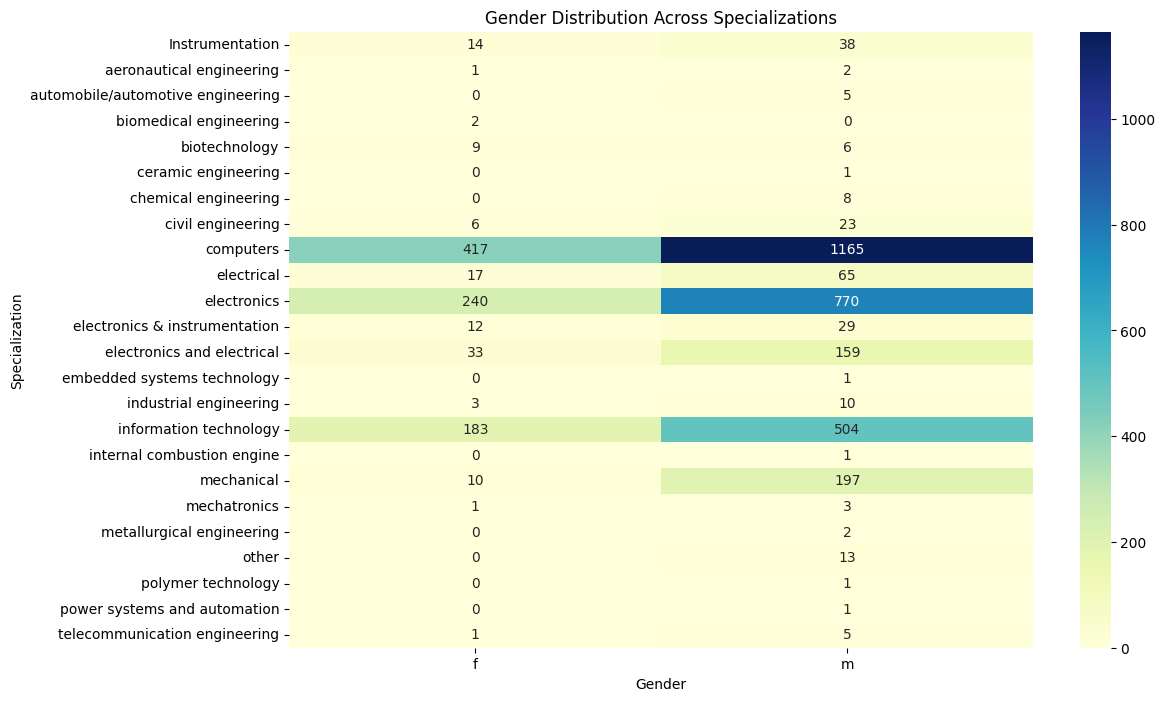

In [200]:
cross_tab = pd.crosstab(data['Specialization'], data['Gender'])

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Gender Distribution Across Specializations')
plt.xlabel('Gender')
plt.ylabel('Specialization')
plt.show()

### **Conclusion :**

Observations were mentioned after each relevant plot . Major observations made are :     
* The target column **Salary** did not have any significant relation with any other column
* Salaries ranges are almost same in both male and female irrespective of gender
* Highest salary is observed in a person with **polymer technology** specialization where there is only one person in it
* Research questions were solved and observed were mentioned above
* All remaining columns does not show significant contribution towards target **salary**

